##Data Science Project
##Topic: Early-Breast-Cancer-Detection-using-Deep-Learning.
##Student ID: 22073997
The main objective of this project is to create and apply a deep learning system to detect breast cancer at an early stage utilising mammography pictures. The purpose of this approach is to improve the accuracy of diagnosis, minimise the occurrence of both false negatives and false positives, and improve patient outcomes by facilitating prompt and accurate treatment.

In [1]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 9.5 MB/s eta 0:00:00


In [2]:
# Standard library for system-specific parameters and functions
import sys

# Standard library for interacting with the operating system
import os
from os import listdir

# Libraries for numerical operations
import numpy as np

# Libraries for creating visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Library for data manipulation and analysis
import pandas as pd

# Library for image processing
from PIL import Image

# Standard library for generating random numbers
import random

# Set the seed for the random number generator for reproducibility
random.seed(100)
np.random.seed(100)

# Library for displaying images
import matplotlib.image as mpimg

# Library for machine learning and deep learning tasks
import tensorflow as tf

# Library for computer vision tasks
import cv2

# Library for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Metrics for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
# Keras utilities for one-hot encoding
from tensorflow.keras.utils import to_categorical

# Keras libraries for building sequential models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Optimizer library from Keras
from tensorflow.keras.optimizers import Adam

# Library for augmenting image data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
from concurrent.futures import ThreadPoolExecutor
# Utility function from Keras for plotting model architecture
from tensorflow.keras.utils import plot_model

# Import the VGG16 model from TensorFlow's Keras applications module.
# A deep convolutional neural network architecture called VGG16 is well-known for its results on the ImageNet visual identification task.
from tensorflow.keras.applications import VGG16

import matplotlib.image as mpimg  # Importing the image module from matplotlib

# Pre-trained models from Keras
from tensorflow.keras.applications import VGG16

# Keras layers for various purposes
from tensorflow.keras.layers import GlobalAveragePooling2D, Input

# Callbacks for early stopping and model checkpoint during training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Library for using pre-trained models from TensorFlow Hub
import tensorflow_hub as hub

# Library for visualizing neural network architectures
import visualkeras

# Library to suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility in TensorFlow
tf.random.set_seed(100)


In [3]:
# Import the drive module from the google.colab package.
# This module is specifically designed for Google Colab notebooks to interact with Google Drive.
from google.colab import drive

# Mounts the Google Drive to the specified mount point in the Colab environment.
# This allows you to access your Google Drive files directly from the notebook.
# '/content/drive' is the common mount point, providing a path to access the drive contents.
drive.mount('/content/drive')

# After executing this, you'll be prompted to authorize access to your Google Drive.
# You'll need to click on the provided link, sign in to your Google account if not already signed in,
# and copy the authorization code back into this notebook to complete the mounting process.
# Once mounted, you can access your Google Drive files under '/content/drive/My Drive/'.

Mounted at /content/drive


In [4]:
# Read DICOM information from a CSV file
dicom_df = pd.read_csv('/content/drive/MyDrive/csv/dicom_info.csv')
dicom_df.head()  # Display the first few rows of the dataframe

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [5]:
# Display a concise summary of the DataFrame, including the number of non-null entries, column data types, and memory usage
dicom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [6]:
# Display unique values in the 'SeriesDescription' column
# This is useful for understanding the different types of series available in the dataset
dicom_df.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [7]:
# Define the base directory where mammogram images are stored
base_image_directory = '/content/drive/MyDrive/jpeg'

# Retrieve image paths from the DataFrame based on the type of mammogram image described in 'SeriesDescription'
full_mammograms = dicom_df[dicom_df['SeriesDescription'] == 'full mammogram images']['image_path']
cropped_mammograms = dicom_df[dicom_df['SeriesDescription'] == 'cropped images']['image_path']
roi_mask_mammograms = dicom_df[dicom_df['SeriesDescription'] == 'ROI mask images']['image_path']

# Adjust the paths to match the new base directory
full_mammograms = full_mammograms.apply(lambda path: path.replace('CBIS-DDSM/jpeg', base_image_directory))
cropped_mammograms = cropped_mammograms.apply(lambda path: path.replace('CBIS-DDSM/jpeg', base_image_directory))
roi_mask_mammograms = roi_mask_mammograms.apply(lambda path: path.replace('CBIS-DDSM/jpeg', base_image_directory))

# Display the path of the first full mammogram image for verification
print("First full mammogram image path:", full_mammograms.iloc[0])

First full mammogram image path: /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg


In [8]:
# Print the shape of the full mammogram images dataframe to understand the dimensions of the data
full_mammograms.shape

(2857,)

In [9]:
# Access the first element in the 'cropped_images' series to get the path of the first cropped image.
# This can be used for further processing, such as loading and displaying the image.
cropped_mammograms.iloc[0]

'/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg'

In [10]:
# Print the shape of the cropped_images dataframe to understand the dimensions of the data
cropped_mammograms.shape

(3567,)

In [11]:
# Access the first element in the 'roi_mask_images' series to get the path of the first roi_mask_images.
# This can be used for further processing, such as loading and displaying the image.
roi_mask_mammograms.iloc[0]

'/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg'

In [12]:
# Print the shape of the roi_mask_images dataframe to understand the dimensions of the data
roi_mask_mammograms.shape

(3247,)

In [13]:
# Initialize dictionaries to store paths of full mammogram, cropped images, and ROI mask images
full_mammogram_dict = dict()
cropped_dict = dict()
roi_mask_dict = dict()

# Populate the full mammogram dictionary with image paths
for dicom in full_mammograms:
    key = dicom.split("/")[5]  # Extract a unique key from the image path
    full_mammogram_dict[key] = dicom  # Map the key to the corresponding image path

# Populate the cropped images dictionary with image paths
for dicom in cropped_mammograms:
    key = dicom.split("/")[5]  # Extract a unique key from the image path
    cropped_dict[key] = dicom  # Map the key to the corresponding image path

# Populate the ROI mask images dictionary with image paths
for dicom in roi_mask_mammograms:
    key = dicom.split("/")[5]  # Extract a unique key from the image path
    roi_mask_dict[key] = dicom  # Map the key to the corresponding image path


In [14]:
# Retrieve the first item from the dictionary of full mammogram images.
# The next(iter()) construct is used to get the first key-value pair from the dictionary.
# This is useful for inspecting or processing the first element without needing to know the key.
first_item_full_mammogram = next(iter(full_mammogram_dict.items()))
print(first_item_full_mammogram )

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849', '/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')


In [15]:
# Get the size in bytes of the dictionary full_mammogram_dict and display it
# sys.getsizeof is used to get the memory usage of the object in bytes
# This can be useful for understanding the memory overhead of storing data structures
sys.getsizeof(full_mammogram_dict)

147552

In [16]:
# Retrieve the first item from the dictionary of cropped_images images.
# The next(iter()) construct is used to get the first key-value pair from the dictionary.
# This is useful for inspecting or processing the first element without needing to know the key.
first_item_cropped_dict = next(iter((cropped_dict.items())))
print(first_item_cropped_dict)

('1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304', '/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg')


In [17]:
# Calculate the memory size of the cropped_images variable in bytes
sys.getsizeof(cropped_mammograms)

594817

In [18]:
# Retrieve the first item from the dictionary of roi_mask_dict images.
# The next(iter()) construct is used to get the first key-value pair from the dictionary.
# This is useful for inspecting or processing the first element without needing to know the key.
first_item_roi_mask = next(iter((roi_mask_dict.items())))
print(first_item_roi_mask)


('1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138', '/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg')


In [19]:
# Calculate the memory size of the roi_mask_images variable in bytes
sys.getsizeof(roi_mask_mammograms)

541457

In [20]:
# Load mass case descriptions for training and testing datasets
mass_train_df = pd.read_csv('/content/drive/MyDrive/csv/mass_case_description_train_set.csv')
mass_test_df = pd.read_csv('/content/drive/MyDrive/csv/mass_case_description_test_set.csv')

# Load calcification case descriptions for training and testing datasets
calc_case_train_df = pd.read_csv('/content/drive/MyDrive/csv/calc_case_description_train_set.csv')
calc_case_test_df = pd.read_csv('/content/drive/MyDrive/csv/calc_case_description_test_set.csv')

In [21]:
# Display the first few rows of the mass_train_df dataframe to get an overview of the dataset
mass_train_df.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [22]:
# Display the first few rows of the mass_test_df dataframe to get an overview of the dataset
mass_test_df.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [23]:
# Display the first few rows of the calc_train_df dataframe to get an overview of the dataset
calc_case_train_df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [24]:
# Display the first few rows of the calc_train_df dataframe to get an overview of the dataset
calc_case_test_df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [25]:
# Calculate the distribution of benign and malignant cases in the training dataset
training_case_distribution = mass_train_df['pathology'].value_counts()

# Calculate the distribution of benign and malignant cases in the test dataset
testing_case_distribution = mass_test_df['pathology'].value_counts()

# Display the counts of benign and malignant cases in the training dataset
print("Distribution of Cases in the Mass Training Set:")
print(training_case_distribution)

# Display the counts of benign and malignant cases in the test dataset
print("\nDistribution of Cases in the Mass Test Set:")
print(testing_case_distribution)

Distribution of Cases in the Mass Training Set:
pathology
MALIGNANT                  637
BENIGN                     577
BENIGN_WITHOUT_CALLBACK    104
Name: count, dtype: int64

Distribution of Cases in the Mass Test Set:
pathology
BENIGN                     194
MALIGNANT                  147
BENIGN_WITHOUT_CALLBACK     37
Name: count, dtype: int64


In [26]:
# Count the number of benign and malignant cases in the training dataset
train_case_counts = calc_case_train_df['pathology'].value_counts()

# Count the number of benign and malignant cases in the test dataset
test_case_counts = calc_case_test_df['pathology'].value_counts()

# Display the counts for the training dataset
print("Calcification Training Set Case Counts:")
print(train_case_counts)

# Display the counts for the test dataset
print("\nCalcification Test Set Case Counts:")
print(test_case_counts)


Calcification Training Set Case Counts:
pathology
MALIGNANT                  544
BENIGN                     528
BENIGN_WITHOUT_CALLBACK    474
Name: count, dtype: int64

Calcification Test Set Case Counts:
pathology
BENIGN                     130
MALIGNANT                  129
BENIGN_WITHOUT_CALLBACK     67
Name: count, dtype: int64


In [27]:
# Function to correct image paths in the given dataset
def updated_path_mass(dataset):
    """
    Corrects the image paths in the given dataset.

    Args:
        dataset (pd.DataFrame): The dataset containing image paths to be corrected.

    Returns:
        None: The dataset is modified in place.
    """
    # Iterate through each row in the dataset
    for i in range(len(dataset)):
        # Correct the path for full mammogram images
        full_mammo_path = dataset.iloc[i, 11]
        img_name = full_mammo_path.split("/")[2]
        if img_name in full_mammogram_dict:
            dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        # Correct the path for cropped images
        cropped_img_path = dataset.iloc[i, 12]
        img_name = cropped_img_path.split("/")[2]
        if img_name in cropped_dict:
            dataset.iloc[i, 12] = cropped_dict[img_name]

        # Correct the path for ROI mask images
        roi_mask_path = dataset.iloc[i, 13]
        img_name = roi_mask_path.split("/")[2]
        if img_name in roi_mask_dict:
            dataset.iloc[i, 13] = roi_mask_dict[img_name]


In [28]:
# Correct the file paths for the training dataset of mass images
updated_path_mass(mass_train_df)

# Correct the file paths for the testing dataset of mass images
updated_path_mass(mass_test_df)

In [29]:
# Display the first few rows of the mass_train_df dataframe
mass_train_df.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...


In [30]:
# Display the first few rows of the mass_test_df dataframe
mass_test_df.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...


In [31]:
# Fix the image paths in the calc_train_df dataframe
updated_path_mass(calc_case_train_df)

# Fix the image paths in the calc_test_df dataframe
updated_path_mass(calc_case_test_df)

In [32]:
# Display the first few rows of the calc_case_train_df dataframe
calc_case_train_df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...


In [33]:
# Display the first few rows of the calc_case_test_data dataframe
calc_case_test_df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


#Data Cleaning

In [34]:
# check unique values in pathology column
mass_train_df.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [35]:
# check unique values in pathology column
calc_case_train_df.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [36]:
# check unique values in pathology column
calc_case_train_df.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [37]:
# Display the summary information of the mass_train_df DataFrame
# This includes details such as the number of entries, column names, non-null counts, and data types.
mass_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [47]:
# Display the summary information of the calc_case_train_df DataFrame
# This includes details such as the number of entries, column names, non-null counts, and data types.
calc_case_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast_density           1546 non-null   int64 
 2   left_or_right_breast     1546 non-null   object
 3   image_view               1546 non-null   object
 4   abnormality_id           1546 non-null   int64 
 5   abnormality_type         1546 non-null   object
 6   calc_type                1546 non-null   object
 7   calc_distribution        1546 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image_file_path          1546 non-null   object
 12  cropped_image_file_path  1546 non-null   object
 13  ROI_mask_file_path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [39]:
# Rename columns for better readability and consistency
mass_train_df = mass_train_df.rename(columns={
    'left or right breast': 'left_or_right_breast',  # Renaming for easier access
    'image view': 'image_view',  # Standardizing column names
    'abnormality id': 'abnormality_id',  # Making column names more descriptive
    'abnormality type': 'abnormality_type',  # Consistent naming convention
    'mass shape': 'mass_shape',  # Simplifying column names
    'mass margins': 'mass_margins',  # Improving column readability
    'image file path': 'image_file_path',  # Clearer path description
    'cropped image file path': 'cropped_image_file_path',  # Consistent naming
    'ROI mask file path': 'ROI_mask_file_path'  # Clear and consistent naming
})

# Display the first few rows of the renamed dataframe to verify changes
print(mass_train_df.head())

  patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality_type                          mass_shape   mass_margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1   

In [40]:
# Rename columns in the calc_train_data DataFrame for consistency and readability
calc_case_train_df = calc_case_train_df.rename(columns={
    'left or right breast': 'left_or_right_breast',  # Renaming column for breast side information
    'breast density': 'breast_density',  # Renaming column for breast density information
    'image view': 'image_view',  # Renaming column for image view information
    'abnormality id': 'abnormality_id',  # Renaming column for abnormality ID
    'abnormality type': 'abnormality_type',  # Renaming column for type of abnormality
    'calc type': 'calc_type',  # Renaming column for calcification type
    'calc distribution': 'calc_distribution',  # Renaming column for calcification distribution
    'image file path': 'image_file_path',  # Renaming column for image file path
    'cropped image file path': 'cropped_image_file_path',  # Renaming column for cropped image file path
    'ROI mask file path': 'ROI_mask_file_path'  # Renaming column for ROI mask file path
})

# Print the first few rows of the renamed DataFrame to verify changes
print(calc_case_train_df.head())

  patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality_type    calc_type calc_distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2       

In [41]:
# check for null values
mass_train_df.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [42]:
# check for null values
calc_case_train_df.isnull().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality_id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image_file_path              0
cropped_image_file_path      0
ROI_mask_file_path           0
dtype: int64

In [43]:
# fill in missing values using the backwards fill method
mass_train_df['mass_shape'] = mass_train_df['mass_shape'].fillna(method='bfill')
mass_train_df['mass_margins'] = mass_train_df['mass_margins'].fillna(method='bfill')

#check null values
mass_train_df.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [44]:
# fill in missing values using the backwards fill method
calc_case_train_df['calc_type'] = calc_case_train_df['calc_type'].fillna(method='bfill')
calc_case_train_df['calc_distribution'] = calc_case_train_df['calc_distribution'].fillna(method='bfill')

#check null values
calc_case_train_df.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [45]:
#check null values
mass_test_df.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [46]:
# Display column names of the mass_test_data DataFrame
print(mass_test_df.columns)
print('\n')

# Rename columns in mass_test_data to more Python-friendly names
mass_test_df = mass_test_df.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

# Display the updated column names in the mass_test DataFrame
print(mass_test_df.columns)

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')


Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'mass_shape', 'mass_margins',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path'],
      dtype='object')


In [48]:
# Fill in missing values using the backward fill method for specified columns
# This method propagates the next values backward to fill missing entries
mass_test_df['mass_margins'] = mass_test_df['mass_margins'].fillna(method='bfill')

# Check for remaining null values in the dataset and display the count of nulls for each column
mass_test_df.isnull().sum()


patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [49]:
# Display the column names in the 'calc_case_test_data' DataFrame
print(calc_case_test_df.columns)
print('\n')

# Rename the columns in the 'calc_case_test_data' DataFrame for consistency and readability
calc_case_test_df = calc_case_test_df.rename(columns={
    'left or right breast': 'left_or_right_breast',
    'breast density': 'breast_density',
    'image view': 'image_view',
    'abnormality id': 'abnormality_id',
    'abnormality type': 'abnormality_type',
    'calc type': 'calc_type',
    'calc distribution': 'calc_distribution',
    'image file path': 'image_file_path',
    'cropped image file path': 'cropped_image_file_path',
    'ROI mask file path': 'ROI_mask_file_path'
})

# Display the column names after renaming
print(calc_case_test_df.columns)


Index(['patient_id', 'breast density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'calc type', 'calc distribution',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')


Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'calc_type', 'calc_distribution',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path'],
      dtype='object')


In [50]:
#check null values
calc_case_test_df.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
calc_type                   4
calc_distribution          63
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [51]:
# Fill in missing values using the backward fill method for specified columns
# This method propagates the next values backward to fill missing entries
calc_case_test_df['calc_type'] = calc_case_test_df['calc_type'].fillna(method='bfill')
calc_case_test_df['calc_distribution'] = calc_case_test_df['calc_distribution'].fillna(method='bfill')

# Check for remaining null values in the dataset and display the count of nulls for each column
calc_case_test_df.isnull().sum()


patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

#Data visualization

In [52]:
# check datasets shape
print(f'Shape of mass_train: {mass_train_df.shape}')
print(f'Shape of mass_test: {mass_test_df.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [53]:
# check datasets shape
print(f'Shape of calc_train: {calc_case_train_df.shape}')
print(f'Shape of calc_test: {calc_case_test_df.shape}')

Shape of calc_train: (1546, 14)
Shape of calc_test: (326, 14)


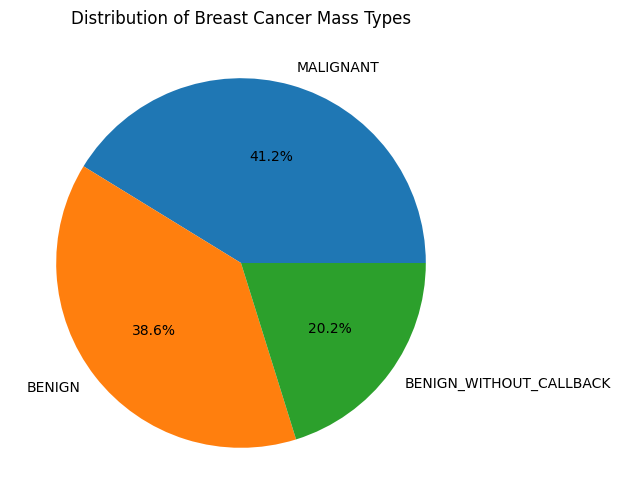

In [54]:
# Combine pathology distributions from mass and calcification datasets
pathology_counts = mass_train_df['pathology'].value_counts() + calc_case_train_df['pathology'].value_counts()

# Set the figure size for the plot
plt.figure(figsize=(10,6))

# Create a pie chart to visualize the distribution of breast cancer mass types
plt.pie(pathology_counts, labels=pathology_counts.index, autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Distribution of Breast Cancer Mass Types', fontsize=12)

# Display the plot
plt.show()

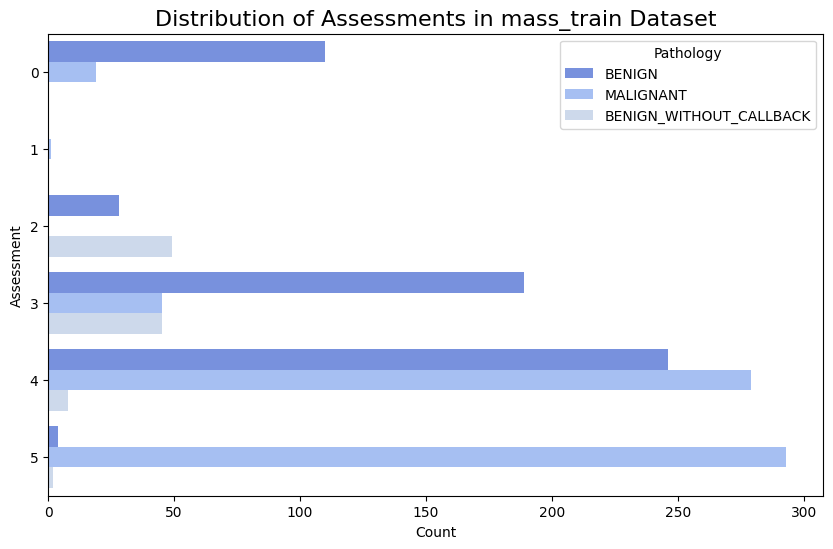

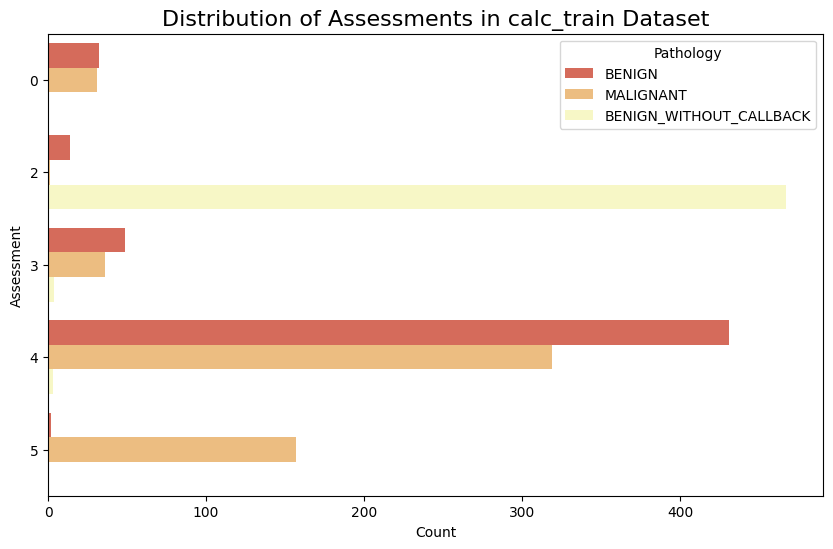

In [55]:
# Define custom color palettes for the plots
mass_palette = sns.color_palette("coolwarm", n_colors=len(mass_train_df['assessment'].unique()))
calc_palette = sns.color_palette("Spectral", n_colors=len(calc_case_train_df['assessment'].unique()))

# Plot distribution of 'assessment' in the mass_train dataset, colored by 'pathology'
plt.figure(figsize=(10, 6))
sns.countplot(data=mass_train_df, y='assessment', hue='pathology', palette=mass_palette)
plt.title('Distribution of Assessments in mass_train Dataset', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Assessment')
plt.legend(title='Pathology')
plt.show()

# Plot distribution of 'assessment' in the calc_train dataset, colored by 'pathology'
plt.figure(figsize=(10, 6))
sns.countplot(data=calc_case_train_df, y='assessment', hue='pathology', palette=calc_palette)
plt.title('Distribution of Assessments in calc_train Dataset', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Assessment')
plt.legend(title='Pathology')
plt.show()

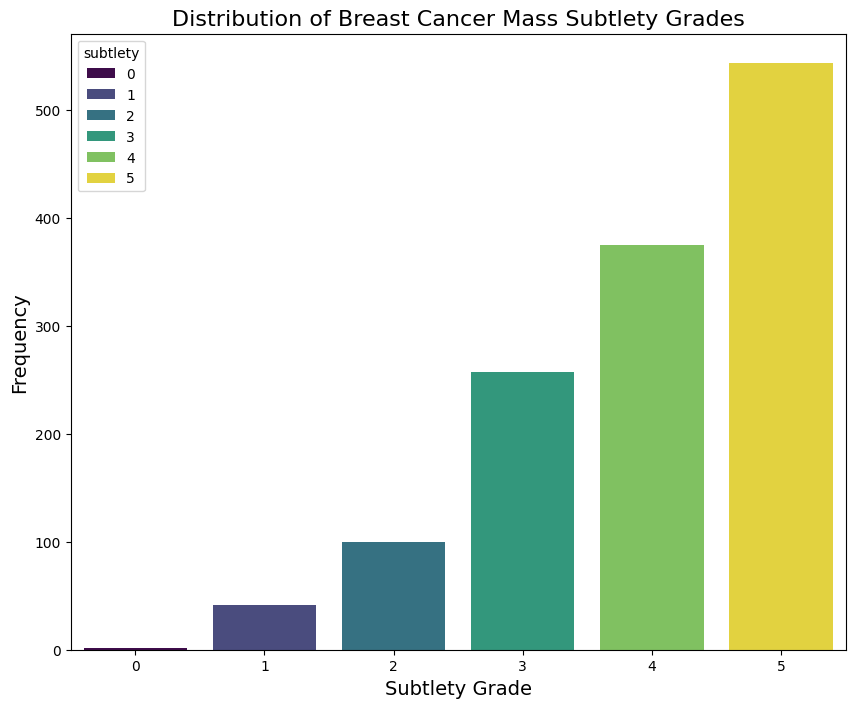

In [56]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 8))

# Create a count plot to visualize the distribution of breast cancer mass subtlety
sns.countplot(data=mass_train_df, x='subtlety', palette='viridis', hue='subtlety')

# Set the title and labels of the plot for clarity
plt.title('Distribution of Breast Cancer Mass Subtlety Grades', fontsize=16)
plt.xlabel('Subtlety Grade', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

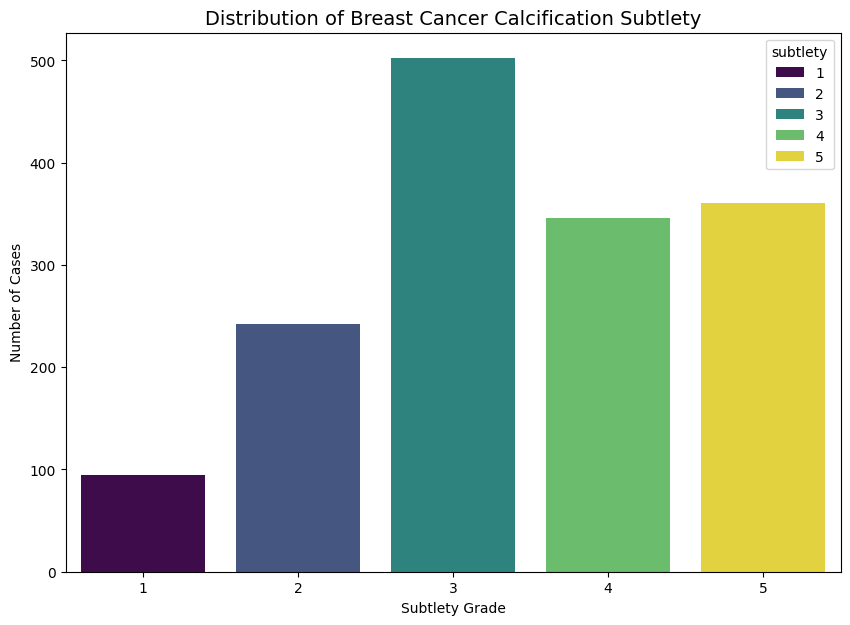

In [57]:
# Create a new figure with a specified size
plt.figure(figsize=(10, 7))

# Generate a count plot for the 'subtlety' column in the calc_case_train_df DataFrame
# using the 'viridis' color palette and differentiating by 'subtlety'
sns.countplot(data=calc_case_train_df, x='subtlety', palette='viridis', hue='subtlety')

# Set the title of the plot with increased font size for better readability
plt.title('Distribution of Breast Cancer Calcification Subtlety', fontsize=14)

# Label the x-axis with 'Subtlety Grade'
plt.xlabel('Subtlety Grade')

# Label the y-axis with 'Number of Cases'
plt.ylabel('Number of Cases')

# Display the plot
plt.show()

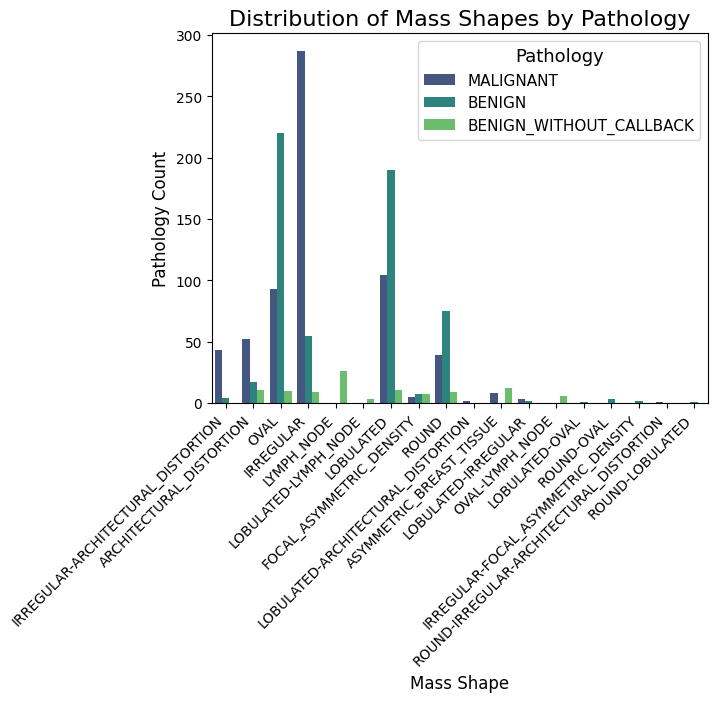

In [58]:
# Plot to visualize the distribution of mass shapes across different pathology categories
sns.countplot(data=mass_train_df, x='mass_shape', hue='pathology', palette='viridis')

# Set the title and labels for the plot
plt.title('Distribution of Mass Shapes by Pathology', fontsize=16)  # Title of the plot
plt.xlabel('Mass Shape', fontsize=12)  # Label for the x-axis
plt.ylabel('Pathology Count', fontsize=12)  # Label for the y-axis

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend with a title
plt.legend(title='Pathology', title_fontsize='13', fontsize='11')

# Display the plot
plt.show()  # Render the plot

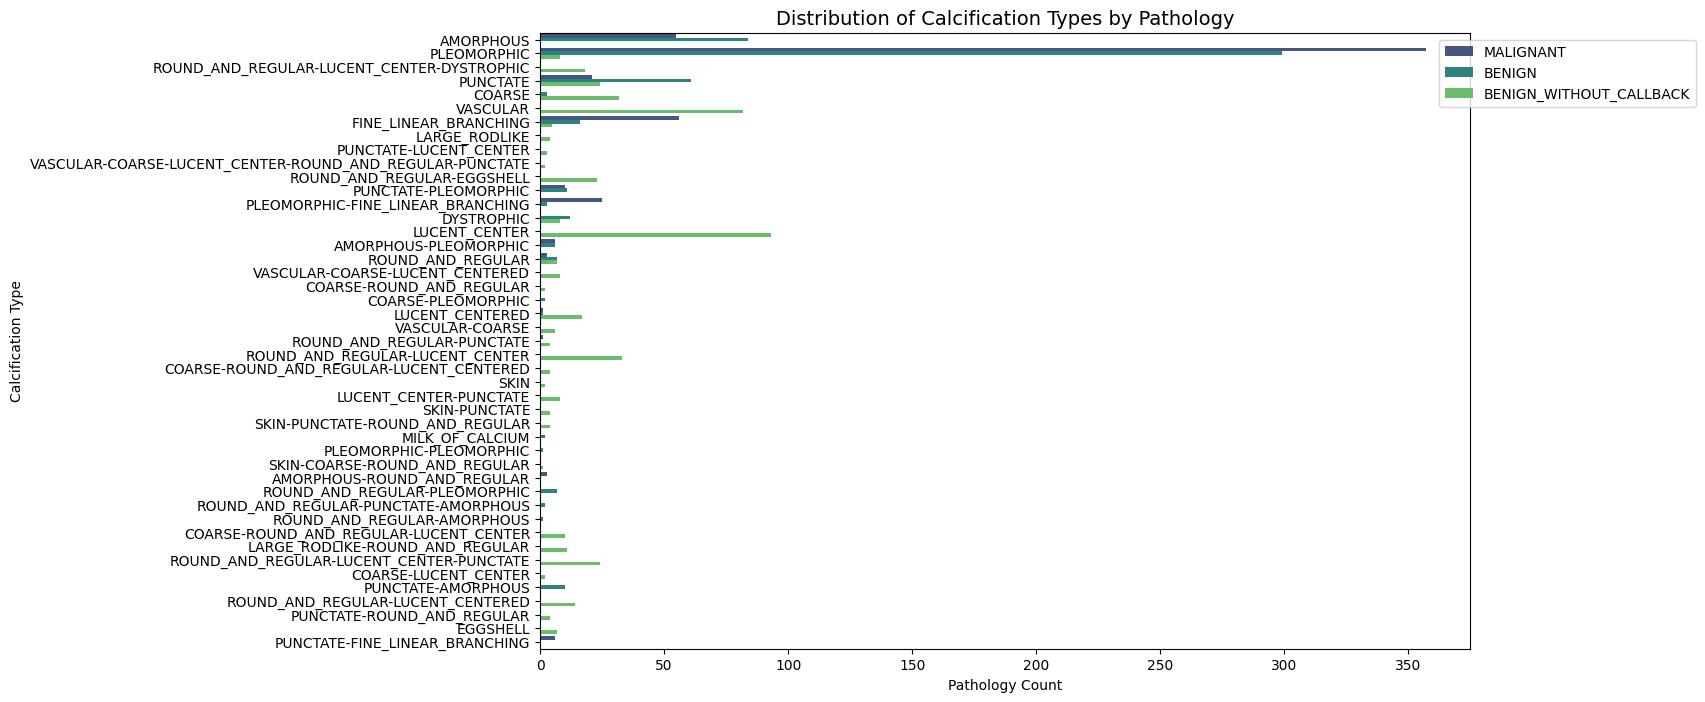

In [59]:
# Set up the figure size for the plot
plt.figure(figsize=(12, 8))

# Create a count plot using Seaborn to visualize the distribution of calcification types by pathology
sns.countplot(data=calc_case_train_df, y='calc_type', hue='pathology', palette='viridis')

# Set the title of the plot with a larger font size
plt.title('Distribution of Calcification Types by Pathology', fontsize=14)

# Set the labels for the x-axis and y-axis
plt.xlabel('Pathology Count')
plt.ylabel('Calcification Type')

# Rotate y-axis labels for better readability, adjusting text alignment
plt.yticks(rotation=0, ha='right')

# Move the legend outside the plot for better visibility and specify its location
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Display the plot
plt.show()

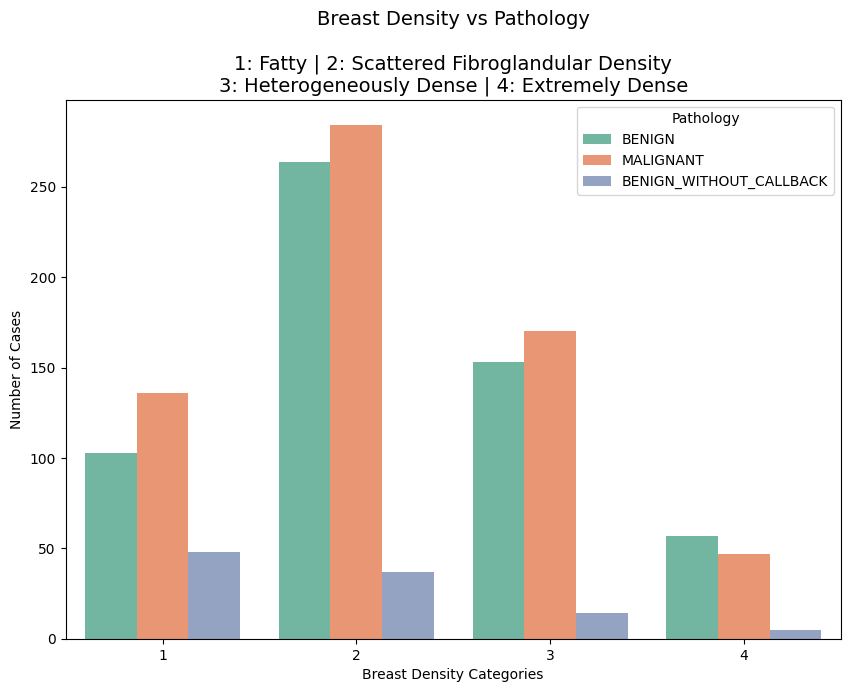

In [60]:
# Visualize the relationship between breast density and pathology
plt.figure(figsize=(10, 7))  # Set the figure size

# Create a count plot with seaborn to show the distribution of breast density against pathology
sns.countplot(data=mass_train_df, x='breast_density', hue='pathology', palette='Set2')

# Set the title of the plot with formatting for clarity
plt.title('Breast Density vs Pathology\n\n1: Fatty | 2: Scattered Fibroglandular Density\n3: Heterogeneously Dense | 4: Extremely Dense', fontsize=14)

# Set the labels for the x and y axes
plt.xlabel('Breast Density Categories')
plt.ylabel('Number of Cases')

# Display the legend
plt.legend(title='Pathology')

# Show the plot
plt.show()

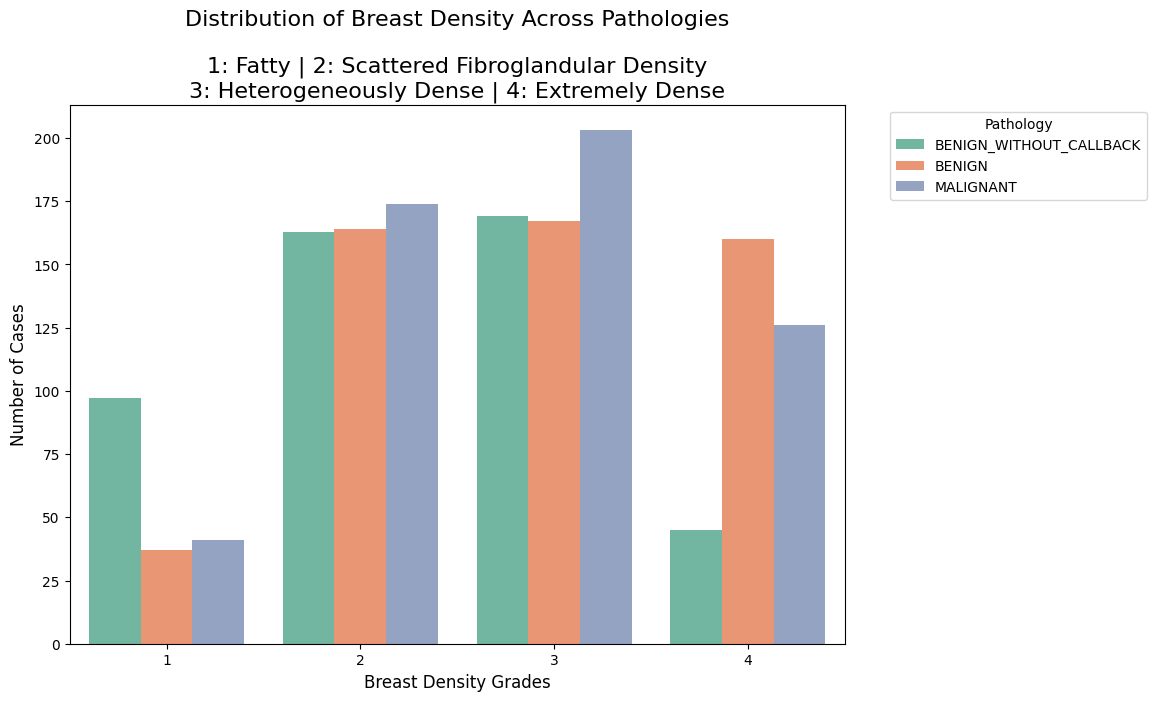

In [61]:
# Plotting the distribution of breast density across different pathologies
plt.figure(figsize=(10, 7))  # Adjust the figure size for better visualization

# Create a count plot showing the relationship between breast density and pathology
sns.countplot(data=calc_case_train_df, x='breast_density', hue='pathology', palette='Set2')

# Set the title with descriptive labels for breast density categories
plt.title('Distribution of Breast Density Across Pathologies\n\n1: Fatty | 2: Scattered Fibroglandular Density\n3: Heterogeneously Dense | 4: Extremely Dense', fontsize=16)

# Label the x-axis as 'Breast Density Grades'
plt.xlabel('Breast Density Grades', fontsize=12)

# Label the y-axis as 'Number of Cases'
plt.ylabel('Number of Cases', fontsize=12)

# Add a legend to the plot for better clarity and position it outside the plot area
plt.legend(title='Pathology', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

Mass Training Dataset


Full Mammograms:

/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/1-207.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/1-250.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890/1-056.jpg


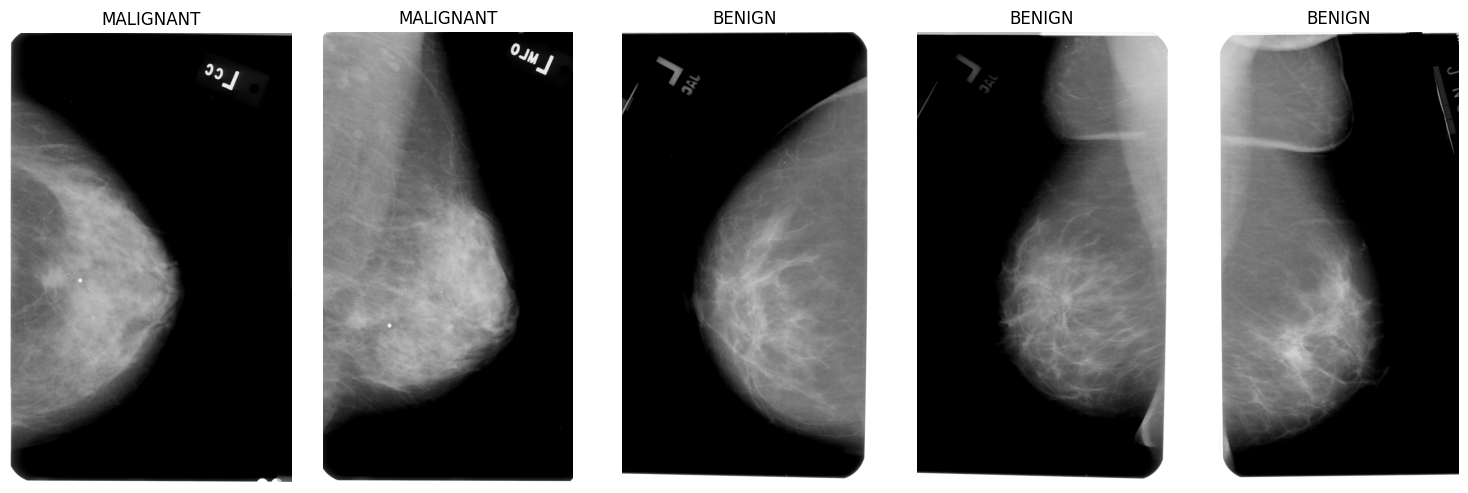

Cropped Mammograms:

/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/2-249.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/1-289.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/2-295.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/2-244.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/1-182.jpg


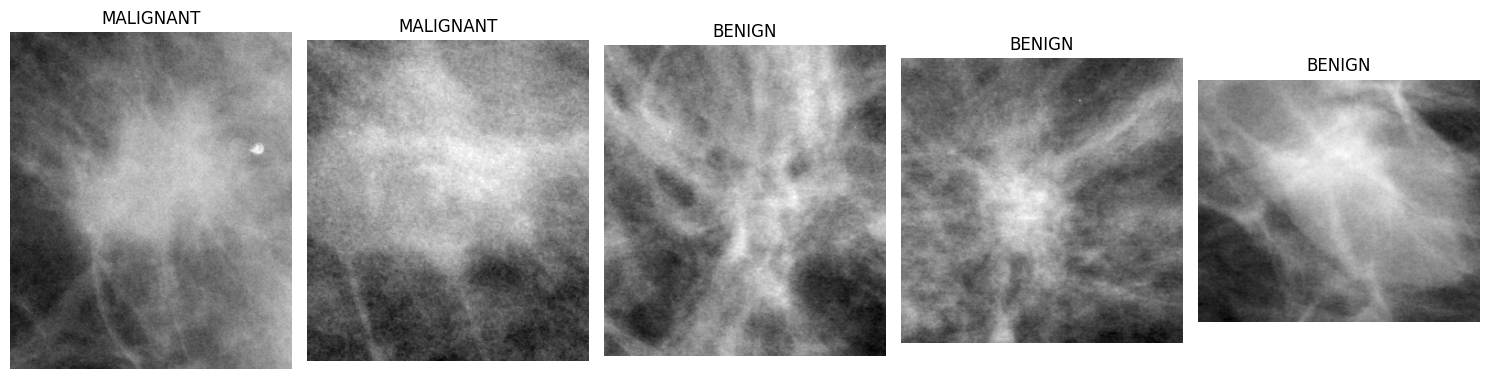

ROI Images:

/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/1-250.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/2-288.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/1-296.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/1-245.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/2-183.jpg


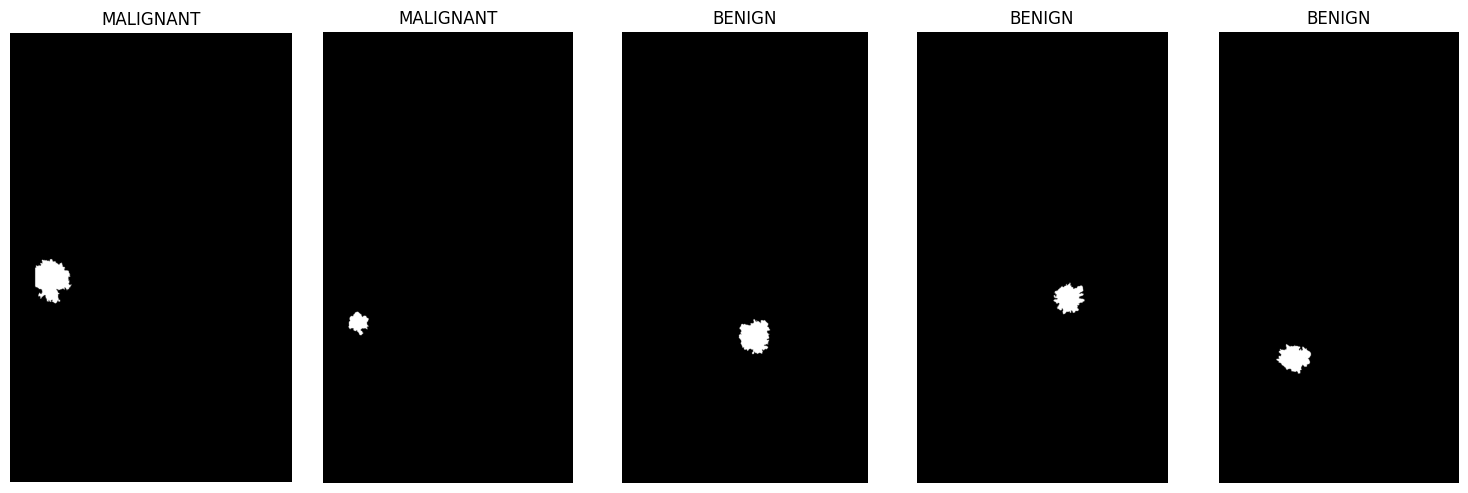

In [62]:
def visualize_images(column, count):
    """Visualizes a specified number of images from the dataset"""
    # Define the number of images to display and the layout
    images_to_display = count
    rows, cols = 1, images_to_display
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))  # Creating a figure with subplots

    # Loop through the dataset rows and display images
    for idx, row in mass_train_df.head(images_to_display).iterrows():
        img_path = row[column]
        print(img_path)  # Print the image path
        # Check if the file exists
        if os.path.exists(img_path):
            img = mpimg.imread(img_path)
            ax = axes[idx]
            ax.imshow(img, cmap='gray')  # Display the image in grayscale
            ax.set_title(f"{row['pathology']}")  # Set the title as the pathology label
            ax.axis('off')  # Turn off the axis
        else:
            print(f"File not found: {img_path}")  # Print a message if the file is not found

    plt.tight_layout()  # Adjust subplots to fit into figure area
    plt.show()  # Display the figure

print('Mass Training Dataset\n\n')
print('Full Mammograms:\n')
visualize_images('image_file_path', 5)  # Display 5 full mammogram images
print('Cropped Mammograms:\n')
visualize_images('cropped_image_file_path', 5)  # Display 5 cropped mammogram images
print('ROI Images:\n')
visualize_images('ROI_mask_file_path', 5)  # Display 5 ROI images

Calcification Training Dataset


Full Mammograms:

/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/1-188.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.250596608311207922527805669693579696727/1-189.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.228699627313487111012474405462022068297/1-190.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.104743410411133110629448544090466900446/1-191.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.406725628213826290127343763811145520834/1-192.jpg


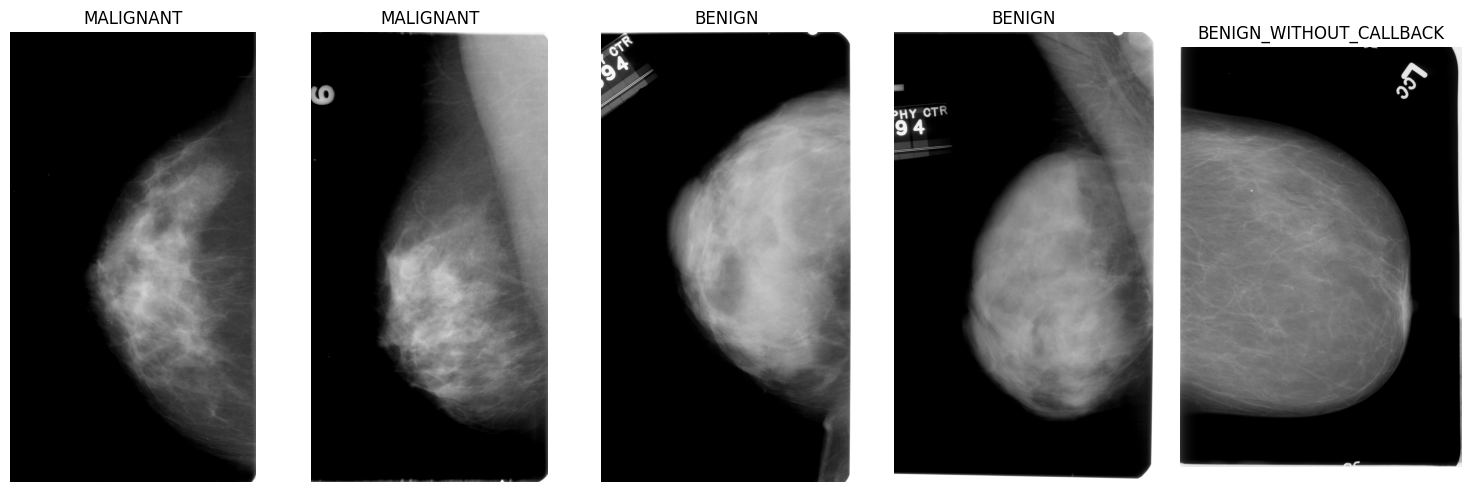

Cropped Mammograms:

/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682/2-191.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.296281207812130400303493285473798422894/1-192.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.314135871111943890422150247820137952041/1-193.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.91458279612485515203413781822560852485/1-194.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.281397494612871934937455783843630775495/1-195.jpg


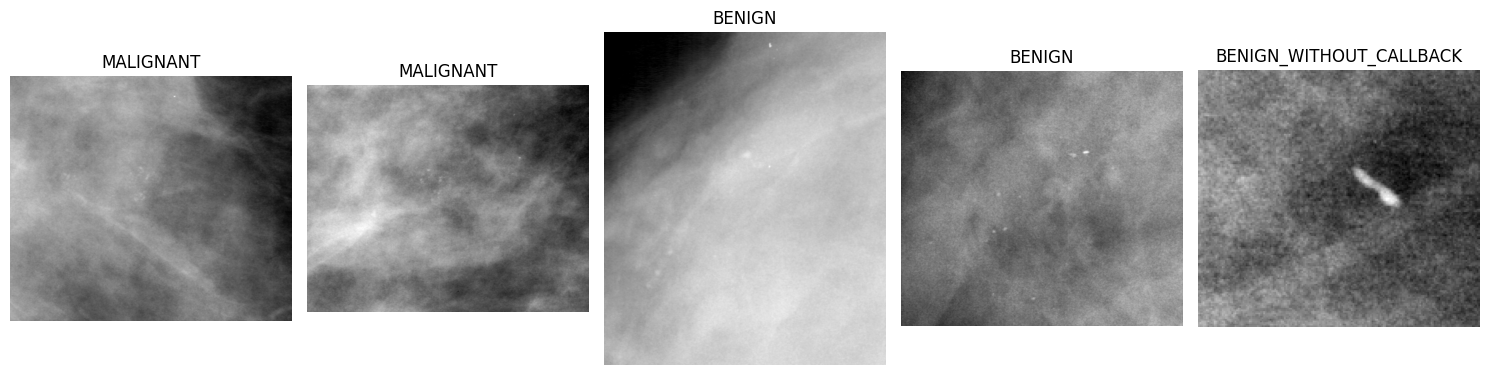

ROI Images:

/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682/1-107.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.296281207812130400303493285473798422894/2-108.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.314135871111943890422150247820137952041/2-109.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.91458279612485515203413781822560852485/2-110.jpg
/content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.100.1.2.281397494612871934937455783843630775495/2-111.jpg


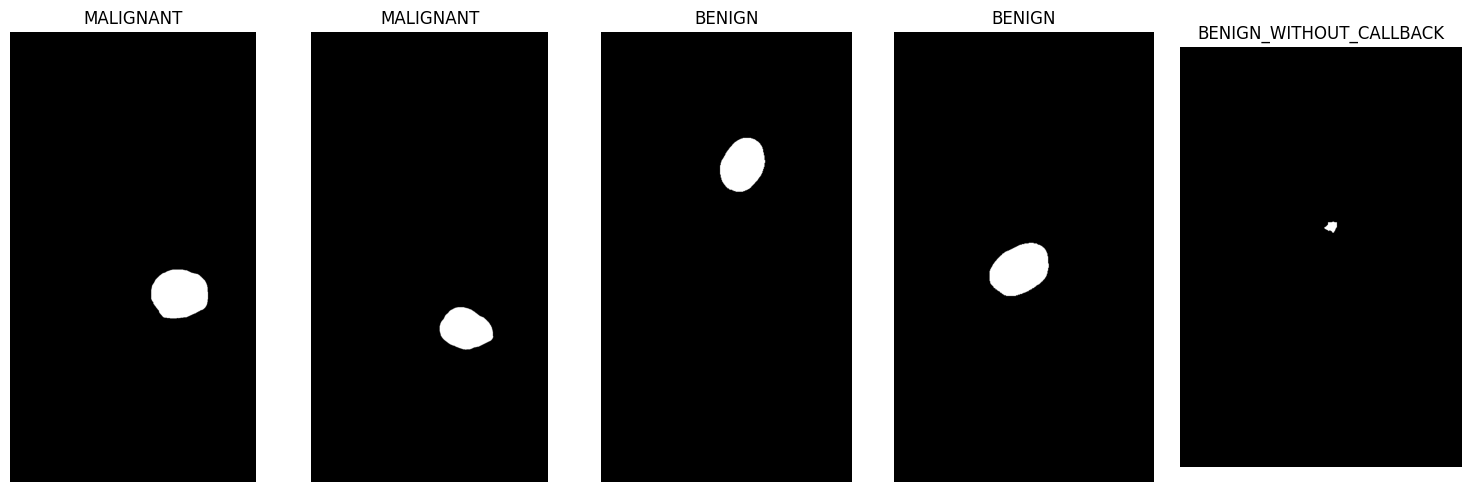

In [63]:
def display_sample_images(column, num_images):
    """Displays a specified number of images from the dataset based on the given column."""

    # Set the number of images to visualize and the layout of the plot
    num_to_display = num_images
    rows = 1
    cols = num_to_display
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

    # Loop through the dataset to display images
    for idx, (_, row) in enumerate(calc_case_train_df.head(num_to_display).iterrows()):
        image_path = row[column]
        print(image_path)  # Print the image path for debugging purposes

        # Check if the image file exists
        if os.path.exists(image_path):
            image = mpimg.imread(image_path)  # Read the image file
            ax = axes[idx]
            ax.imshow(image, cmap='gray')  # Display the image in grayscale
            ax.set_title(f"{row['pathology']}")  # Set the title to the pathology
            ax.axis('off')  # Remove axis ticks and labels
        else:
            print(f"File not found: {image_path}")  # Print an error message if the file is not found

    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()  # Display the plot

# Display images from different datasets
print('Calcification Training Dataset\n\n')
print('Full Mammograms:\n')
display_sample_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_sample_images('cropped_image_file_path', 5)
print('ROI Images:\n')
display_sample_images('ROI_mask_file_path', 5)

#Data Preprocessing

In [64]:
# Define a dictionary for pathology classification
pathology_mapping = {"MALIGNANT": 0, "BENIGN_WITHOUT_CALLBACK": 1, "BENIGN": 1}

def load_and_resize_image(image_path):
    """Load and resize the image to the specified dimensions."""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    resized_img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
    return resized_img

def map_pathology_to_class(pathology):
    """Map pathology to numerical values using the classification dictionary."""
    return pathology_mapping[pathology]

def process_images_and_labels(dataframe):
    """Load images and map pathology using parallel processing."""
    with ThreadPoolExecutor() as executor:
        images = np.array(list(executor.map(load_and_resize_image, dataframe['image_file_path'])))
        labels = np.array(list(executor.map(map_pathology_to_class, dataframe['pathology'])))
    # Convert pathology labels to categorical format
    labels = to_categorical(labels)
    return images, labels

# Shuffle the training and test datasets
shuffled_train_data = mass_train_df.sample(frac=1)
shuffled_test_data = mass_test_df.sample(frac=1)

# Measure the time taken to load and resize images
start_time = time.perf_counter()
(X_train, y_train) = process_images_and_labels(shuffled_train_data)
(X_test, y_test) = process_images_and_labels(shuffled_test_data)
end_time = time.perf_counter()
print(f"Loaded and resized images in {end_time - start_time:0.4f} seconds")

# Display the shapes of the training and test datasets
print('train_images shape: {}'.format(X_train.shape))
print('train_labels shape: {}'.format(y_train.shape))
print('test_images shape: {}'.format(X_test.shape))
print('test_labels shape: {}'.format(y_test.shape))

Loaded and resized images in 142.2590 seconds
train_images shape: (1318, 224, 224, 3)
train_labels shape: (1318, 2)
test_images shape: (378, 224, 224, 3)
test_labels shape: (378, 2)


In [65]:
# Calculate and display the percentage of training and test data
total_samples = X_train.shape[0] + X_test.shape[0]
train_percentage = (X_train.shape[0] / total_samples) * 100
test_percentage = (X_test.shape[0] / total_samples) * 100

print(f'Training data percentage: {train_percentage:.2f}%')
print(f'Test data percentage: {test_percentage:.2f}%')

Training data percentage: 77.71%
Test data percentage: 22.29%


#CNN Model

In [66]:
# Define an image data generator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [87]:
def build_cnn_model(input_shape):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))  # Increased neuron count in the dense layer
    model.add(Dropout(0.2))  # Dropout rate adjustment
    model.add(Dense(2, activation='softmax'))

    # Compile the model using the Adam optimizer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    return model, early_stopping_callback

cnn_model, early_stopping_callback = build_cnn_model(input_shape=(224, 224, 3))

# Train the CNN model
cnn_model_history = cnn_model.fit(datagen.flow(X_train, y_train, batch_size=75), epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# Evaluate the model on the test set and print final accuracy and loss
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Final Validation Loss: {test_loss:.4f}')
print(f'Final Validation Accuracy: {test_accuracy:.4f}')

Epoch 1/50
18/18 [==============================] - 14s 719ms/step - loss: 59.5821 - accuracy: 0.4977 - val_loss: 0.9059 - val_accuracy: 0.4841
Epoch 2/50
18/18 [==============================] - 13s 741ms/step - loss: 0.7428 - accuracy: 0.5083 - val_loss: 0.7333 - val_accuracy: 0.4815
Epoch 3/50
18/18 [==============================] - 14s 751ms/step - loss: 0.7052 - accuracy: 0.5220 - val_loss: 0.7176 - val_accuracy: 0.5053
Epoch 4/50
18/18 [==============================] - 14s 748ms/step - loss: 0.6878 - accuracy: 0.5584 - val_loss: 0.7303 - val_accuracy: 0.4550
Epoch 5/50
18/18 [==============================] - 14s 777ms/step - loss: 0.6811 - accuracy: 0.5781 - val_loss: 0.7131 - val_accuracy: 0.5608
Epoch 6/50
18/18 [==============================] - 14s 762ms/step - loss: 0.6827 - accuracy: 0.5690 - val_loss: 0.7721 - val_accuracy: 0.4894
Epoch 7/50
18/18 [==============================] - 14s 757ms/step - loss: 0.6915 - accuracy: 0.5349 - val_loss: 0.6983 - val_accuracy: 0.584

In [88]:
# Display the model summary
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

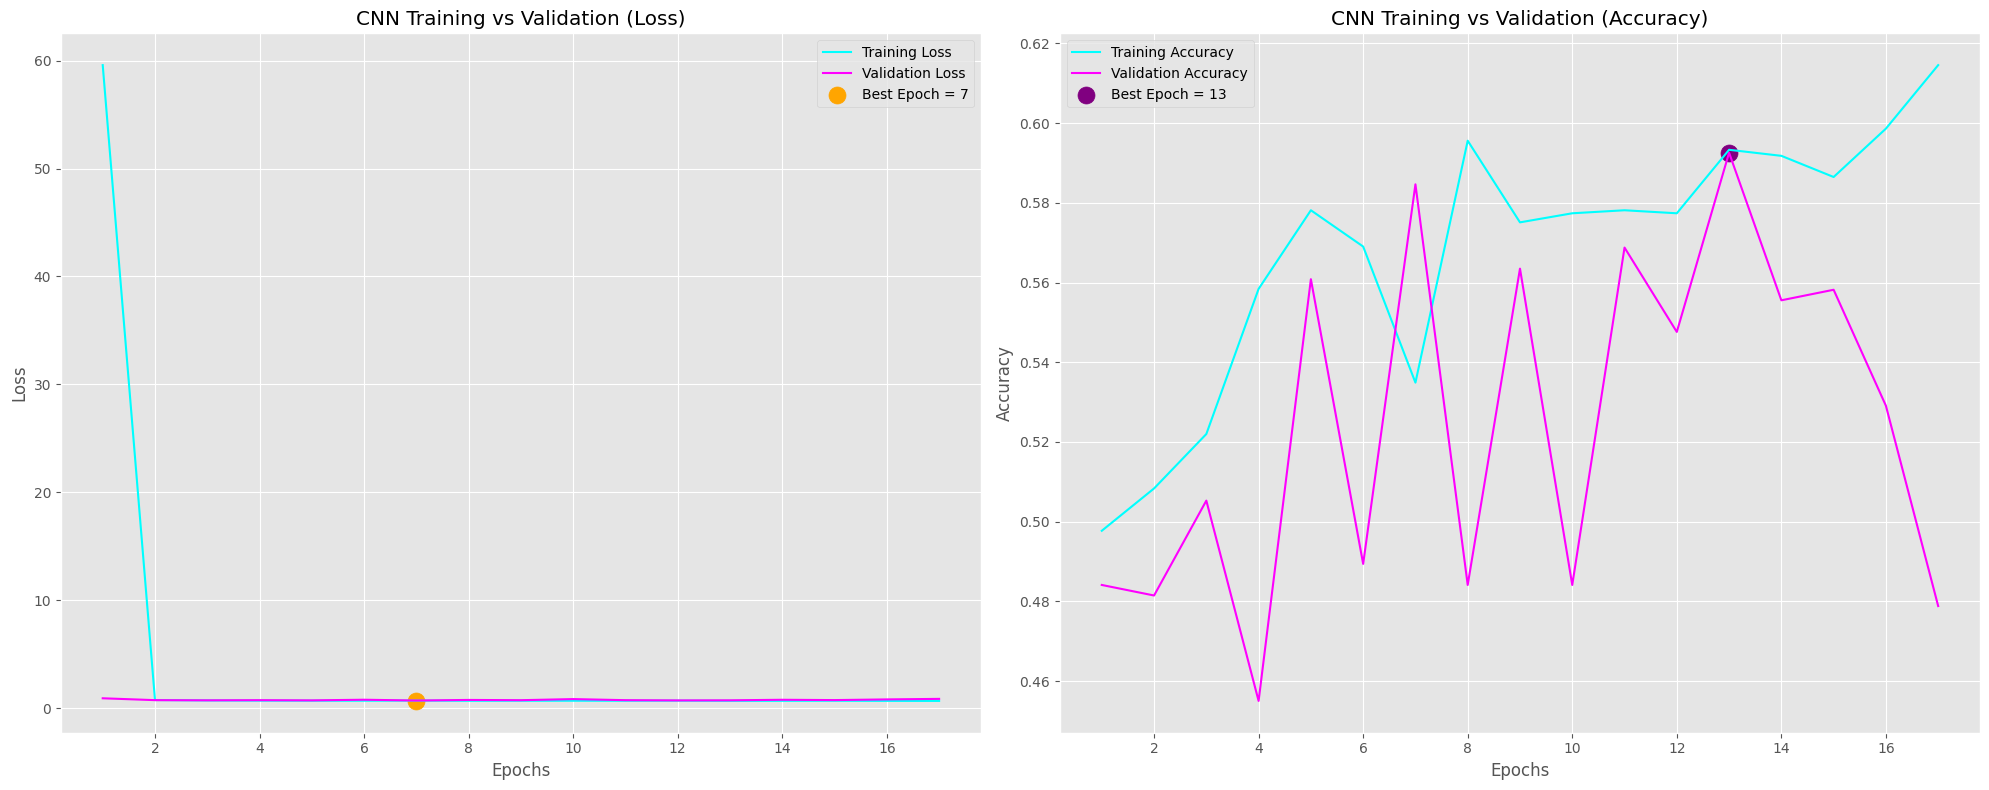

12/12 - 0s - loss: 0.6983 - accuracy: 0.5847 - 167ms/epoch - 14ms/step
CNN Test Loss: 0.6982975006103516
CNN Test Accuracy: 0.5846560597419739


In [89]:
# Extract training and validation metrics from the training history
training_accuracy = cnn_model_history.history['accuracy']
training_loss = cnn_model_history.history['loss']

validation_accuracy = cnn_model_history.history['val_accuracy']
validation_loss = cnn_model_history.history['val_loss']

# Identify the best epochs based on validation loss and accuracy
best_epoch_for_loss = np.argmin(validation_loss)
best_epoch_for_accuracy = np.argmax(validation_accuracy)
lowest_val_loss = validation_loss[best_epoch_for_loss]
highest_val_accuracy = validation_accuracy[best_epoch_for_accuracy]

# Generate a list of epoch numbers
epochs = range(1, len(training_accuracy) + 1)
label_for_loss = f'Best Epoch = {best_epoch_for_loss + 1}'
label_for_accuracy = f'Best Epoch = {best_epoch_for_accuracy + 1}'

# Plot Training vs Validation Loss
plt.figure(figsize=(20, 8))
plt.style.use('ggplot')

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'cyan', label='Training Loss')
plt.plot(epochs, validation_loss, 'magenta', label='Validation Loss')
plt.scatter(best_epoch_for_loss + 1, lowest_val_loss, s=150, c='orange', label=label_for_loss)
plt.title('CNN Training vs Validation (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'cyan', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'magenta', label='Validation Accuracy')
plt.scatter(best_epoch_for_accuracy + 1, highest_val_accuracy, s=150, c='purple', label=label_for_accuracy)
plt.title('CNN Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f'CNN Test Loss: {test_loss}')
print(f'CNN Test Accuracy: {test_accuracy}')

In [90]:
def evaluate_model_performance(model, X_data, y_data, dataset_name):
    """
    Evaluate the performance of a trained model on a given dataset and display various metrics.
    Additionally, plots a confusion matrix.

    Args:
        model (tf.keras.Model): The trained model to evaluate.
        X_data (np.ndarray): Input features for evaluation.
        y_data (np.ndarray): True labels corresponding to X_data.
        dataset_name (str): Name of the dataset (e.g., 'Train', 'Validation', 'Test').

    Returns:
        None
    """
    # Predict the labels for the dataset
    y_pred = model.predict(X_data)

    # Convert predicted probabilities to binary labels
    y_pred_binary = np.argmax(y_pred, axis=1)
    y_true_binary = np.argmax(y_data, axis=1)

    # Calculate performance metrics
    accuracy = accuracy_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    precision = precision_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    confusion_mat = confusion_matrix(y_true_binary, y_pred_binary)

    # Print performance metrics
    print(f"{dataset_name} Dataset Performance:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"Confusion Matrix:\n{confusion_mat}\n")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["BENIGN", "MALIGNANT"], yticklabels=["BENIGN", "MALIGNANT"])
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

42/42 [==============================] - 1s 11ms/step
Train Dataset Performance:
Accuracy: 0.607
Recall: 0.508
Precision: 0.654
F1 Score: 0.572
Confusion Matrix:
[[454 183]
 [335 346]]



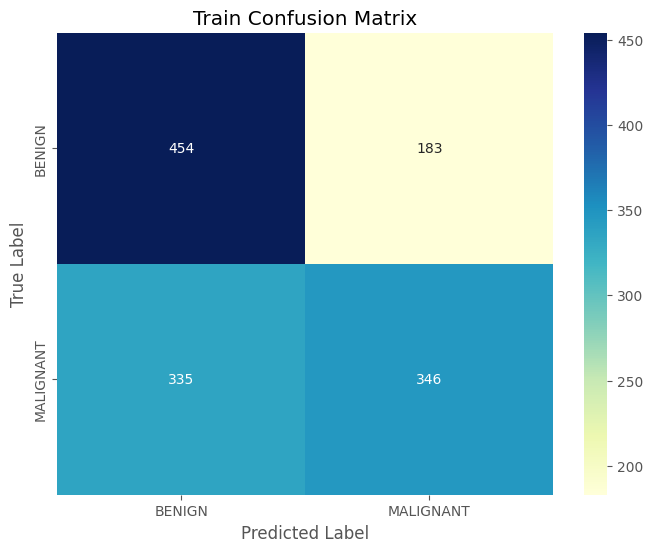

In [91]:
#Train data
evaluate_model_performance(cnn_model, X_train, y_train, "Train")

12/12 [==============================] - 0s 11ms/step
Test Dataset Performance:
Accuracy: 0.585
Recall: 0.498
Precision: 0.737
F1 Score: 0.594
Confusion Matrix:
[[106  41]
 [116 115]]



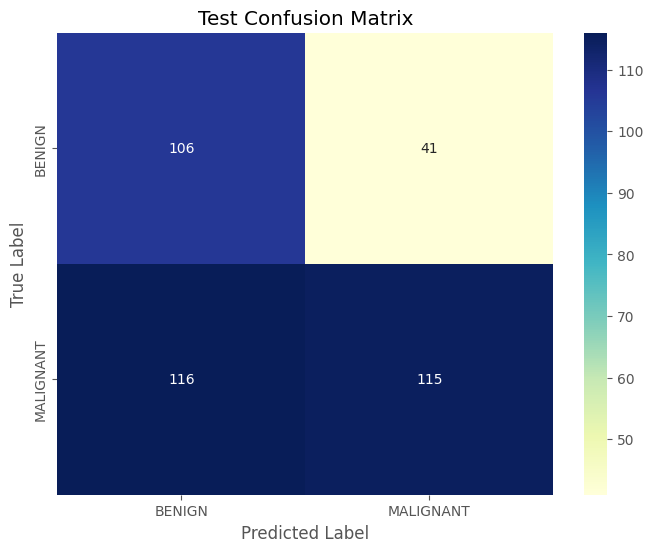

In [92]:
#test data
evaluate_model_performance(cnn_model, X_test, y_test, "Test")

12/12 [==============================] - 0s 11ms/step


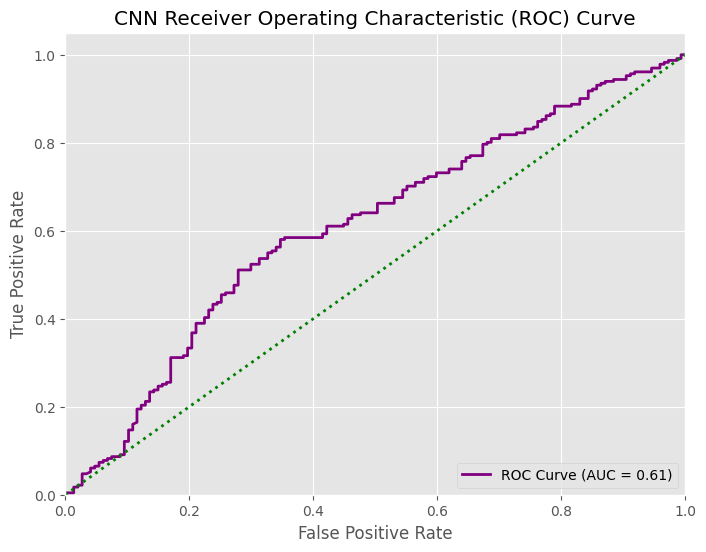

Area Under the Curve (AUC): 0.61


In [93]:
# Predict the probabilities for the test set using the trained model
y_pred_probability = cnn_model.predict(X_test)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_probability[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output the AUC score
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')


#EfficientNetB0 base

In [94]:
# Modified model with EfficientNetB0 base
def build_efficientnet_model(input_dimensions):
    """Build and compile a model using EfficientNetB0 as the base."""
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_dimensions)

    efficientnet_model = Sequential()
    efficientnet_model.add(base_model)

    efficientnet_model.add(GlobalAveragePooling2D())
    efficientnet_model.add(Dense(256, activation='relu'))
    efficientnet_model.add(Dropout(0.2))
    efficientnet_model.add(Dense(128, activation='relu'))
    efficientnet_model.add(Dropout(0.2))
    efficientnet_model.add(Dense(2, activation='softmax'))

    # Compile the model
    efficientnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    return efficientnet_model, early_stop

# Define the input shape
input_shape_model = (224, 224, 3)

# Create and compile the EfficientNetB0 model
model_efficientnet, early_stop_efficientnet = build_efficientnet_model(input_shape_model)

# Train the EfficientNet model
efficientnet_history = model_efficientnet.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50,
                                              validation_data=(X_test, y_test), callbacks=[early_stop_efficientnet])

# Evaluate the model on the test set
test_loss_efficientnet, test_accuracy_efficientnet = model_efficientnet.evaluate(X_test, y_test)
print(f'Final Validation Loss (EfficientNetB0): {test_loss_efficientnet:.4f}')
print(f'Final Validation Accuracy (EfficientNetB0): {test_accuracy_efficientnet:.4f}')
# Save the EfficientNetB0 model  file
model_efficientnet.save('efficientnetb0_model_cbis.h5')
print("Modified EfficientNetB0 Model saved to disk.")

Epoch 1/50
42/42 [==============================] - 47s 366ms/step - loss: 0.7112 - accuracy: 0.5561 - val_loss: 0.6559 - val_accuracy: 0.6190
Epoch 2/50
42/42 [==============================] - 14s 324ms/step - loss: 0.6586 - accuracy: 0.6131 - val_loss: 0.7355 - val_accuracy: 0.6138
Epoch 3/50
42/42 [==============================] - 14s 327ms/step - loss: 0.6451 - accuracy: 0.6449 - val_loss: 0.6217 - val_accuracy: 0.6534
Epoch 4/50
42/42 [==============================] - 14s 327ms/step - loss: 0.6143 - accuracy: 0.6791 - val_loss: 0.7157 - val_accuracy: 0.6376
Epoch 5/50
42/42 [==============================] - 14s 325ms/step - loss: 0.6017 - accuracy: 0.6904 - val_loss: 0.5953 - val_accuracy: 0.6984
Epoch 6/50
42/42 [==============================] - 14s 324ms/step - loss: 0.5975 - accuracy: 0.6912 - val_loss: 0.6363 - val_accuracy: 0.6323
Epoch 7/50
42/42 [==============================] - 14s 321ms/step - loss: 0.5809 - accuracy: 0.7003 - val_loss: 1.0495 - val_accuracy: 0.6138

In [95]:
# Display the model summary
model_efficientnet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 256)               327936    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)              

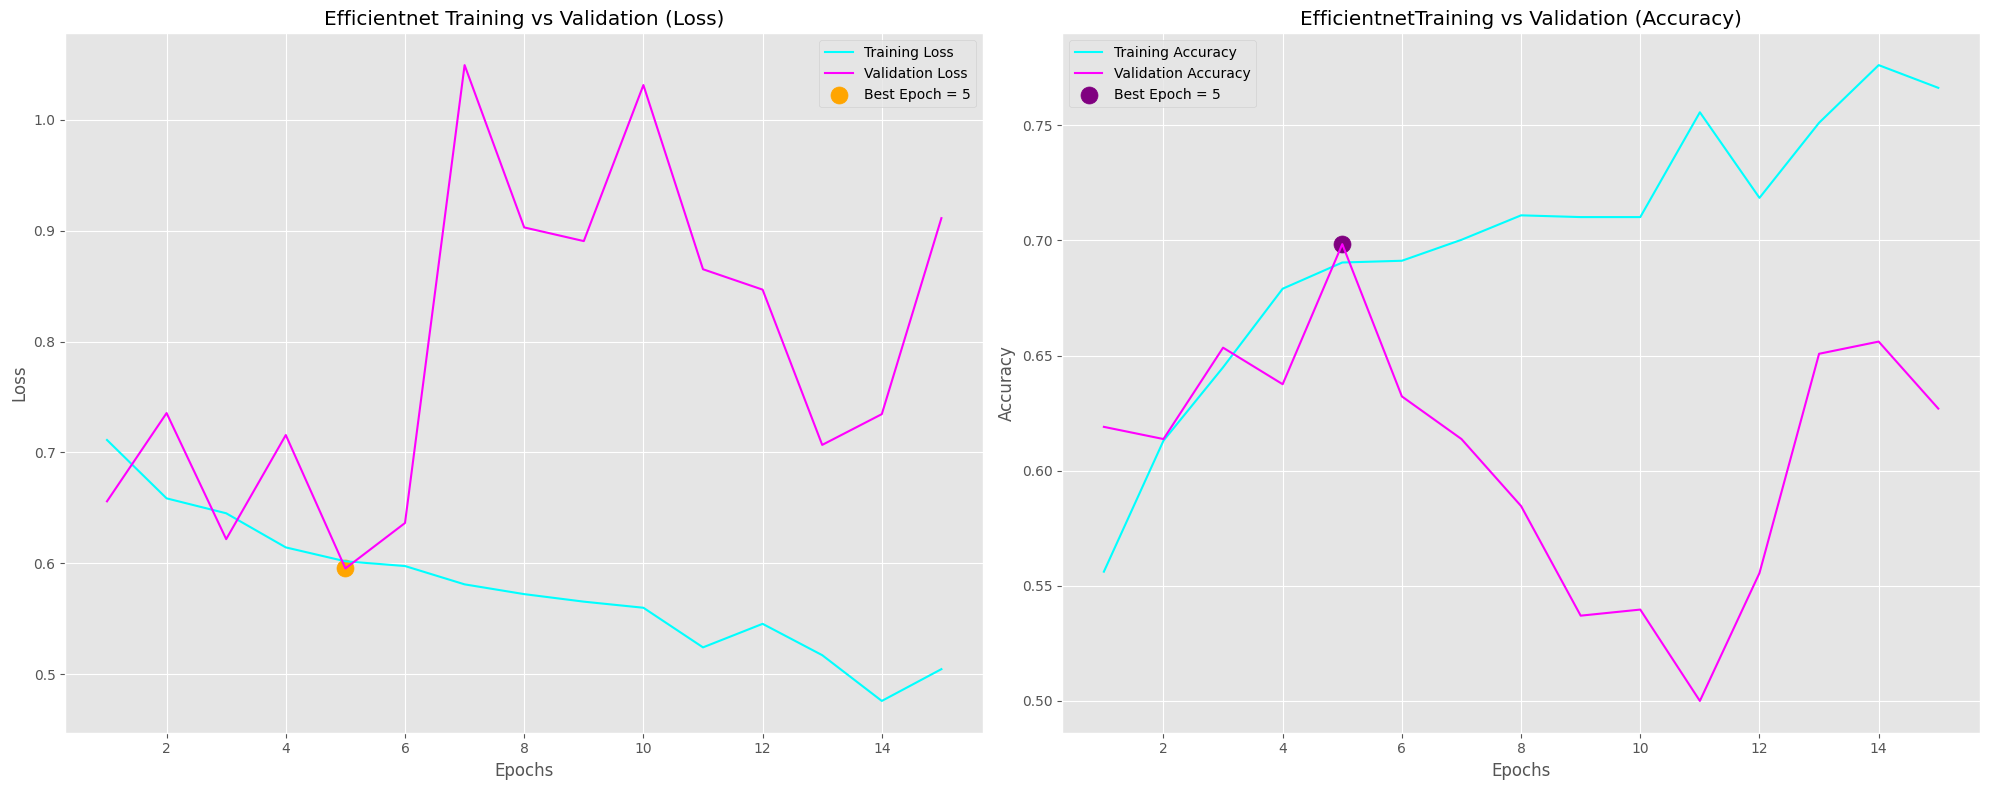

12/12 [==============================] - 0s 35ms/step - loss: 0.5953 - accuracy: 0.6984
Final Validation Loss (EfficientNetB0): 0.5953
Final Validation Accuracy (EfficientNetB0): 0.6984


In [96]:
# Extract training and validation metrics from the training history
training_accuracy = efficientnet_history.history['accuracy']
training_loss = efficientnet_history.history['loss']

validation_accuracy = efficientnet_history.history['val_accuracy']
validation_loss = efficientnet_history.history['val_loss']

# Identify the best epochs based on validation loss and accuracy
best_epoch_for_loss = np.argmin(validation_loss)
best_epoch_for_accuracy = np.argmax(validation_accuracy)
lowest_val_loss = validation_loss[best_epoch_for_loss]
highest_val_accuracy = validation_accuracy[best_epoch_for_accuracy]

# Generate a list of epoch numbers
epochs = range(1, len(training_accuracy) + 1)
label_for_loss = f'Best Epoch = {best_epoch_for_loss + 1}'
label_for_accuracy = f'Best Epoch = {best_epoch_for_accuracy + 1}'

# Plot Training vs Validation Loss
plt.figure(figsize=(20, 8))
plt.style.use('ggplot')

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'cyan', label='Training Loss')
plt.plot(epochs, validation_loss, 'magenta', label='Validation Loss')
plt.scatter(best_epoch_for_loss + 1, lowest_val_loss, s=150, c='orange', label=label_for_loss)
plt.title('Efficientnet Training vs Validation (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'cyan', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'magenta', label='Validation Accuracy')
plt.scatter(best_epoch_for_accuracy + 1, highest_val_accuracy, s=150, c='purple', label=label_for_accuracy)
plt.title('EfficientnetTraining vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss_efficientnet, test_accuracy_efficientnet = model_efficientnet.evaluate(X_test, y_test)
print(f'Final Validation Loss (EfficientNetB0): {test_loss_efficientnet:.4f}')
print(f'Final Validation Accuracy (EfficientNetB0): {test_accuracy_efficientnet:.4f}')

42/42 [==============================] - 3s 33ms/step
Train Dataset Performance:
Accuracy: 0.712
Recall: 0.722
Precision: 0.720
F1 Score: 0.721
Confusion Matrix:
[[446 191]
 [189 492]]



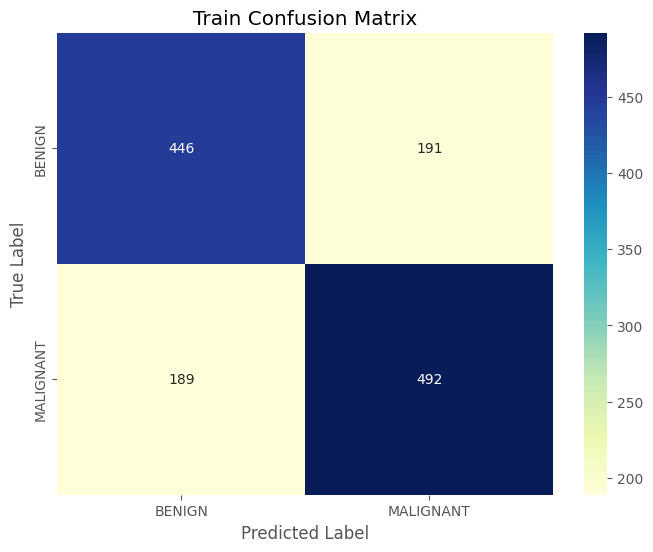

In [97]:
#Train data
evaluate_model_performance(model_efficientnet, X_train, y_train, "Train")

12/12 [==============================] - 0s 32ms/step
Test Dataset Performance:
Accuracy: 0.698
Recall: 0.727
Precision: 0.767
F1 Score: 0.747
Confusion Matrix:
[[ 96  51]
 [ 63 168]]



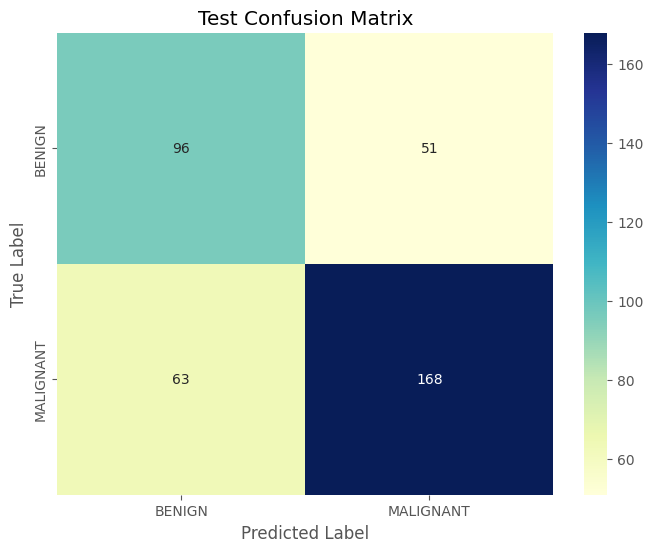

In [98]:
#test data
evaluate_model_performance(model_efficientnet, X_test, y_test, "Test")

12/12 [==============================] - 0s 32ms/step


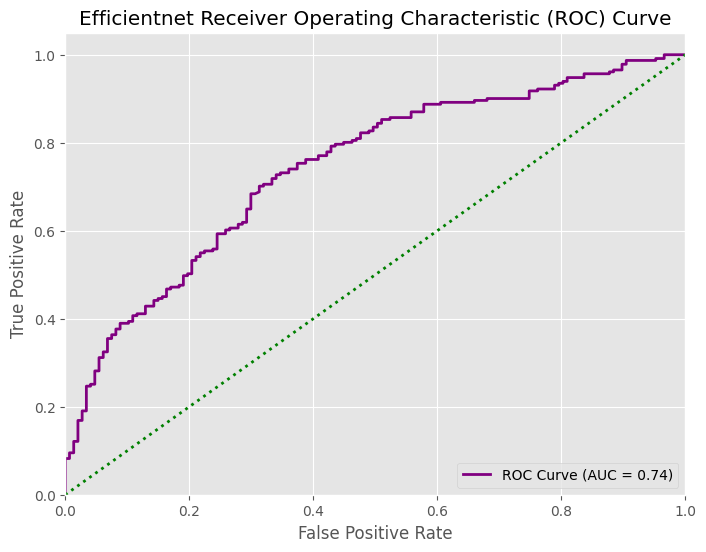

Area Under the Curve (AUC): 0.74


In [99]:
# Predict the probabilities for the test set using the trained model
y_pred_probability = model_efficientnet.predict(X_test)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_probability[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Efficientnet Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output the AUC score
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')

#VGG16 model


In [77]:
# Initialize the VGG16 model with pre-trained weights from the ImageNet dataset.
# Setting include_top=False removes the top fully connected layers, making the model appropriate for feature extraction tasks.
# The input_shape parameter defines the expected input image dimensions, which are 128x128 pixels with 3 color channels (RGB).
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Loop over each layer in the VGG model.
for layer in VGG_model.layers:
    # Mark the layer as non-trainable.
    # This prevents the layer's weights and biases from being altered during the training process.
    # In transfer learning, freezing the pre-trained layers is crucial as it preserves the information the model has acquired from the ImageNet dataset.
    layer.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


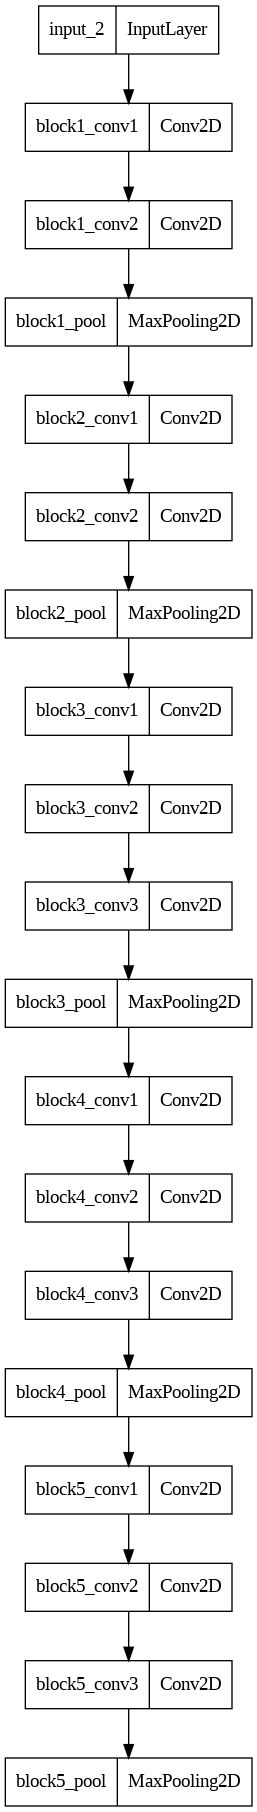

In [78]:
visualkeras.layered_view(VGG_model,legend=True)
plot_model(VGG_model)

In [92]:
# Load the total number of labels in `num_labels`.
num_labels = shuffled_train_data['pathology'].apply(map_pathology_to_class).nunique()

# Load the pre-trained VGG16 model without the top classification layer.
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a Sequential model instance.
Vgg16_model = Sequential()

# Add the pre-trained VGG16 model (excluding the top classification layer) as the base of the new model.
Vgg16_model.add(VGG_model)

# Flatten the output of the VGG16 model to feed into dense layers, which require 1D inputs.
Vgg16_model.add(Flatten())

# Add a Dense (fully connected) layer with 256 neurons to interpret the features extracted by VGG16.
# The number of neurons can be adjusted based on the dataset's complexity.
Vgg16_model.add(Dense(65, activation='relu'))

# Add a Dropout layer with a dropout rate of 0.5 to prevent overfitting.
Vgg16_model.add(Dropout(0.5))

# Add the final Dense layer for classification.
# The number of neurons should match the number of classes, using a softmax activation function
# to output the probabilities for each class.
Vgg16_model.add(Dense(num_labels, activation='softmax'))

# Display the model summary
Vgg16_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 65)                1630785   
                                                                 
 dropout_4 (Dropout)         (None, 65)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 132       
                                                                 
Total params: 16345605 (62.35 MB)
Trainable params: 16345605 (62.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
# Compile the model with optimizer, loss function, and evaluation metric.
Vgg16_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


# Train the model
vgg16_history = Vgg16_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50,
                                validation_data=(X_test, y_test))

# Evaluate the model on the test set
vgg16_test_loss, vgg16_test_accuracy = Vgg16_model.evaluate(X_test, y_test)
print(f'Test loss: {vgg16_test_loss}')
print(f'Test accuracy: {vgg16_test_accuracy}')

Epoch 1/50
42/42 [==============================] - 17s 311ms/step - loss: 2.5163 - accuracy: 0.4985 - val_loss: 0.6943 - val_accuracy: 0.5238
Epoch 2/50
42/42 [==============================] - 13s 318ms/step - loss: 0.6903 - accuracy: 0.5516 - val_loss: 0.6717 - val_accuracy: 0.6164
Epoch 3/50
42/42 [==============================] - 14s 323ms/step - loss: 0.6925 - accuracy: 0.5395 - val_loss: 0.6998 - val_accuracy: 0.4815
Epoch 4/50
42/42 [==============================] - 13s 318ms/step - loss: 0.6921 - accuracy: 0.5349 - val_loss: 0.6792 - val_accuracy: 0.5847
Epoch 5/50
42/42 [==============================] - 14s 322ms/step - loss: 0.6876 - accuracy: 0.5410 - val_loss: 0.6993 - val_accuracy: 0.5291
Epoch 6/50
42/42 [==============================] - 13s 319ms/step - loss: 0.6885 - accuracy: 0.5379 - val_loss: 0.6533 - val_accuracy: 0.6323
Epoch 7/50
42/42 [==============================] - 13s 317ms/step - loss: 0.6947 - accuracy: 0.5273 - val_loss: 0.6743 - val_accuracy: 0.6085

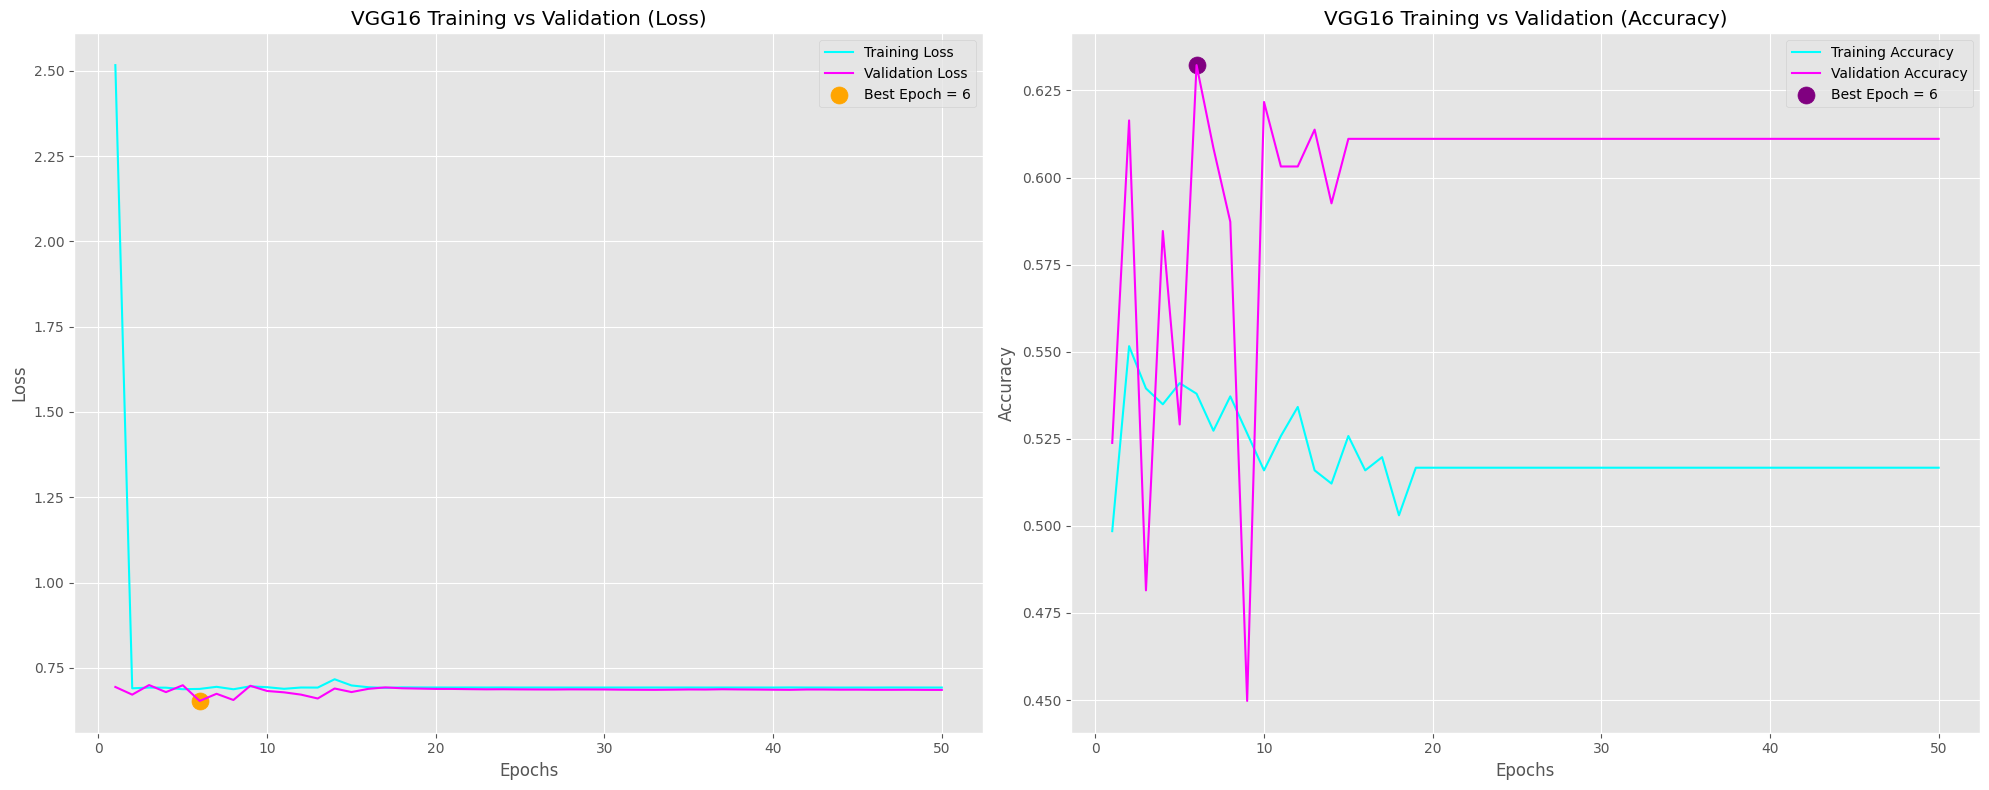

12/12 [==============================] - 0s 21ms/step - loss: 0.6856 - accuracy: 0.6111
Test loss: 0.6856074333190918
Test accuracy: 0.6111111044883728


In [98]:
# Extract training and validation metrics from the training history
training_accuracy = vgg16_history.history['accuracy']
training_loss = vgg16_history.history['loss']

validation_accuracy = vgg16_history.history['val_accuracy']
validation_loss = vgg16_history.history['val_loss']

# Identify the best epochs based on validation loss and accuracy
best_epoch_for_loss = np.argmin(validation_loss)
best_epoch_for_accuracy = np.argmax(validation_accuracy)
lowest_val_loss = validation_loss[best_epoch_for_loss]
highest_val_accuracy = validation_accuracy[best_epoch_for_accuracy]

# Generate a list of epoch numbers
epochs = range(1, len(training_accuracy) + 1)
label_for_loss = f'Best Epoch = {best_epoch_for_loss + 1}'
label_for_accuracy = f'Best Epoch = {best_epoch_for_accuracy + 1}'

# Plot Training vs Validation Loss
plt.figure(figsize=(20, 8))
plt.style.use('ggplot')

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'cyan', label='Training Loss')
plt.plot(epochs, validation_loss, 'magenta', label='Validation Loss')
plt.scatter(best_epoch_for_loss + 1, lowest_val_loss, s=150, c='orange', label=label_for_loss)
plt.title('VGG16 Training vs Validation (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'cyan', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'magenta', label='Validation Accuracy')
plt.scatter(best_epoch_for_accuracy + 1, highest_val_accuracy, s=150, c='purple', label=label_for_accuracy)
plt.title('VGG16 Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
vgg16_test_loss, vgg16_test_accuracy = Vgg16_model.evaluate(X_test, y_test)
print(f'Test loss: {vgg16_test_loss}')
print(f'Test accuracy: {vgg16_test_accuracy}')

42/42 [==============================] - 1s 18ms/step
Train Dataset Performance:
Accuracy: 0.517
Recall: 1.000
Precision: 0.517
F1 Score: 0.681
Confusion Matrix:
[[  0 637]
 [  0 681]]



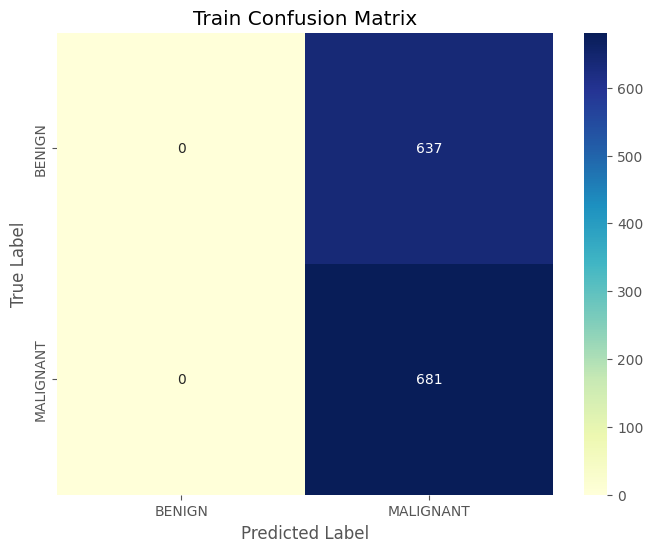

In [99]:
#Train data
evaluate_model_performance(Vgg16_model, X_train, y_train, "Train")

12/12 [==============================] - 0s 18ms/step
validation Dataset Performance:
Accuracy: 0.611
Recall: 1.000
Precision: 0.611
F1 Score: 0.759
Confusion Matrix:
[[  0 147]
 [  0 231]]



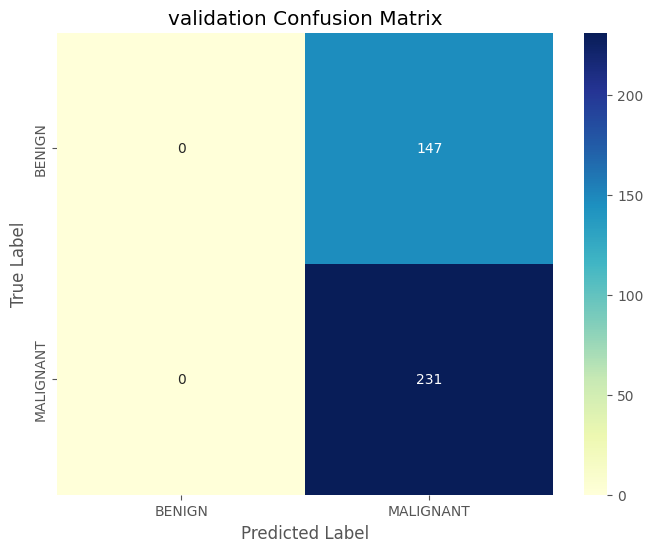

In [100]:
#validation data
evaluate_model_performance(Vgg16_model, X_test, y_test, "validation")

12/12 [==============================] - 0s 18ms/step


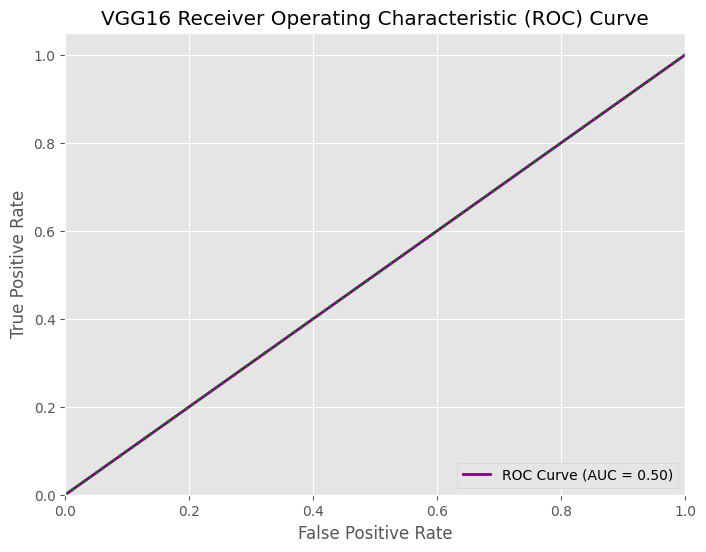

Area Under the Curve (AUC): 0.50


In [101]:
# Predict the probabilities for the test set using the trained model
y_pred_probability = Vgg16_model.predict(X_test)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_probability[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('VGG16 Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output the AUC score
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')

#Mobile Net model

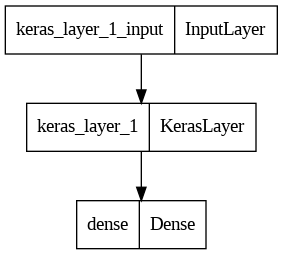

In [69]:
# Load MobileNet model
mobilenet_model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(num_labels, activation='softmax')
])
plot_model(mobilenet_model)

In [70]:
mobilenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [100]:
# Compile the model
mobilenet_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Define the ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint('best_mobilenet_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the MobileNet model with the checkpoint callback
mobilenet_history = mobilenet_model.fit(X_train, y_train, epochs=50,
                                        validation_data=(X_test, y_test),
                                        callbacks=[checkpoint])

# Load the best model saved during training
best_mobilenet_model = tf.keras.models.load_model('best_mobilenet_model.h5', custom_objects={'KerasLayer': hub.KerasLayer})

# Evaluate the best model on the test data
mobilenet_model_test_loss, mobilenet_model_test_acc = best_mobilenet_model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {mobilenet_model_test_loss}")
print(f"Test Accuracy: {mobilenet_model_test_acc}")

Epoch 1/50
42/42 [==============================] - 3s 47ms/step - loss: 0.4720 - accuracy: 0.7686 - val_loss: 0.7081 - val_accuracy: 0.6455
Epoch 2/50
42/42 [==============================] - 1s 32ms/step - loss: 0.4836 - accuracy: 0.7625 - val_loss: 0.7047 - val_accuracy: 0.6587
Epoch 3/50
42/42 [==============================] - 1s 27ms/step - loss: 0.5012 - accuracy: 0.7511 - val_loss: 0.7087 - val_accuracy: 0.6429
Epoch 4/50
42/42 [==============================] - 1s 27ms/step - loss: 0.4642 - accuracy: 0.7762 - val_loss: 0.7241 - val_accuracy: 0.6349
Epoch 5/50
42/42 [==============================] - 1s 26ms/step - loss: 0.4578 - accuracy: 0.7769 - val_loss: 0.7287 - val_accuracy: 0.6587
Epoch 6/50
42/42 [==============================] - 1s 27ms/step - loss: 0.4683 - accuracy: 0.7693 - val_loss: 0.7058 - val_accuracy: 0.6561
Epoch 7/50
42/42 [==============================] - 1s 27ms/step - loss: 0.4684 - accuracy: 0.7686 - val_loss: 0.7611 - val_accuracy: 0.6164
Epoch 8/50
42

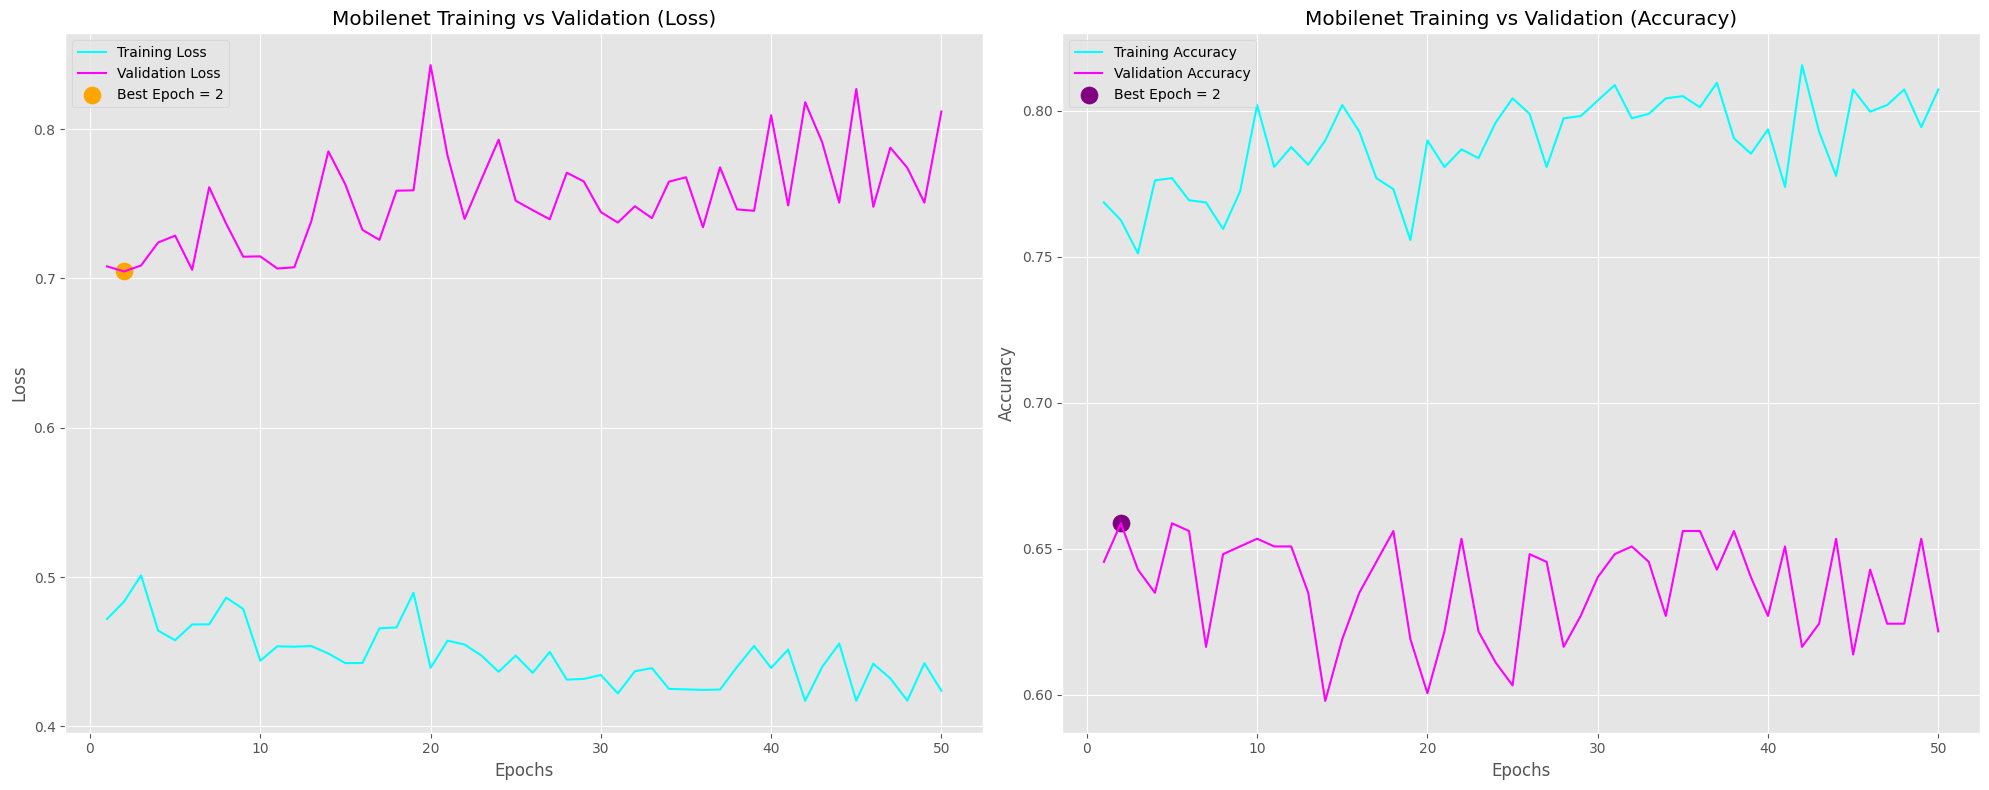

12/12 - 0s - loss: 0.7047 - accuracy: 0.6587 - 251ms/epoch - 21ms/step
Test Loss: 0.7046905159950256
Test Accuracy: 0.658730149269104


In [101]:
# Extract training and validation metrics from the training history
training_accuracy = mobilenet_history.history['accuracy']
training_loss = mobilenet_history.history['loss']

validation_accuracy = mobilenet_history.history['val_accuracy']
validation_loss = mobilenet_history.history['val_loss']

# Identify the best epochs based on validation loss and accuracy
best_epoch_for_loss = np.argmin(validation_loss)
best_epoch_for_accuracy = np.argmax(validation_accuracy)
lowest_val_loss = validation_loss[best_epoch_for_loss]
highest_val_accuracy = validation_accuracy[best_epoch_for_accuracy]

# Generate a list of epoch numbers
epochs = range(1, len(training_accuracy) + 1)
label_for_loss = f'Best Epoch = {best_epoch_for_loss + 1}'
label_for_accuracy = f'Best Epoch = {best_epoch_for_accuracy + 1}'

# Plot Training vs Validation Loss
plt.figure(figsize=(20, 8))
plt.style.use('ggplot')

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'cyan', label='Training Loss')
plt.plot(epochs, validation_loss, 'magenta', label='Validation Loss')
plt.scatter(best_epoch_for_loss + 1, lowest_val_loss, s=150, c='orange', label=label_for_loss)
plt.title('Mobilenet Training vs Validation (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'cyan', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'magenta', label='Validation Accuracy')
plt.scatter(best_epoch_for_accuracy + 1, highest_val_accuracy, s=150, c='purple', label=label_for_accuracy)
plt.title('Mobilenet Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the best model on the test data
mobilenet_model_test_loss, mobilenet_model_test_acc = best_mobilenet_model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {mobilenet_model_test_loss}")
print(f"Test Accuracy: {mobilenet_model_test_acc}")

42/42 [==============================] - 1s 18ms/step
Train Dataset Performance:
Accuracy: 0.755
Recall: 0.907
Precision: 0.704
F1 Score: 0.793
Confusion Matrix:
[[377 260]
 [ 63 618]]



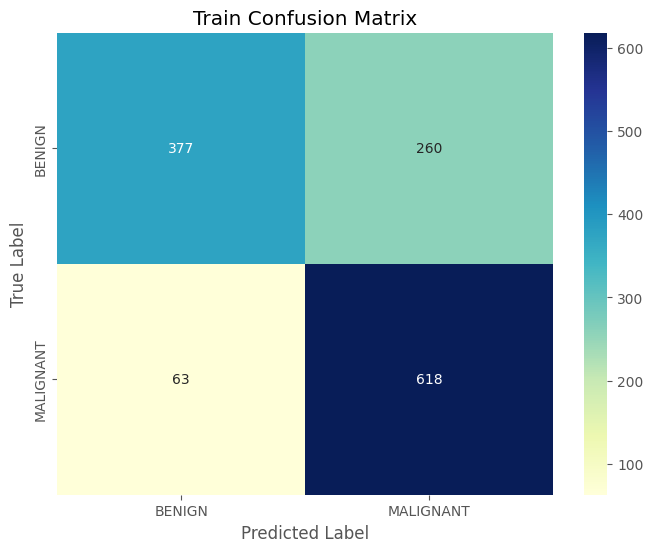

In [102]:
#Train data
evaluate_model_performance(best_mobilenet_model, X_train, y_train, "Train")

12/12 [==============================] - 0s 18ms/step
Test Dataset Performance:
Accuracy: 0.659
Recall: 0.805
Precision: 0.689
F1 Score: 0.743
Confusion Matrix:
[[ 63  84]
 [ 45 186]]



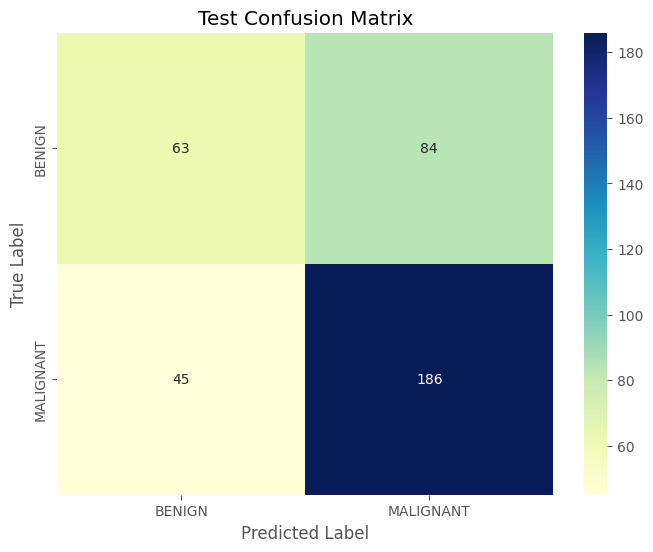

In [103]:
#test data
evaluate_model_performance(best_mobilenet_model, X_test, y_test, "Test")

12/12 [==============================] - 0s 18ms/step


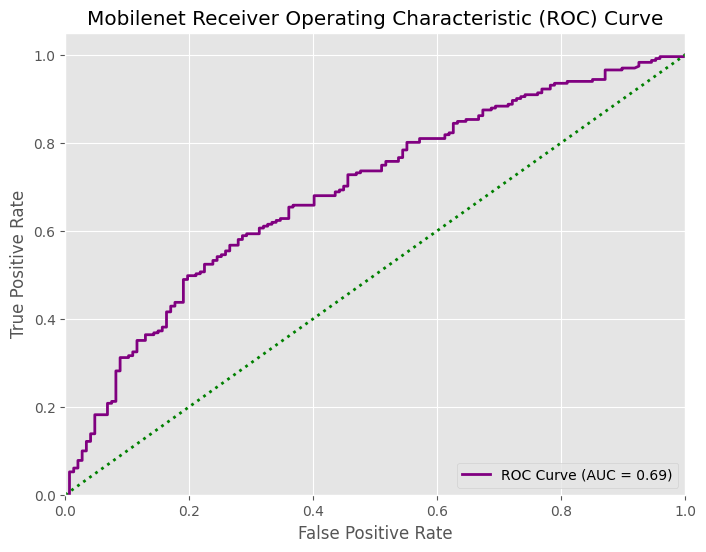

Area Under the Curve (AUC): 0.69


In [104]:
# Predict the probabilities for the test set using the trained model
y_pred_probability = best_mobilenet_model.predict(X_test)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_probability[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mobilenet Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output the AUC score
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')